<a href="https://www.kaggle.com/kalilurrahman/mastercard-stock-analysis?scriptVersionId=89684107" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mastercard-stock-data-latest-and-updated/Mastercard_stock_info.csv
/kaggle/input/mastercard-stock-data-latest-and-updated/Mastercard_stock_history.csv


![Mastercard](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a4/Mastercard_2019_logo.svg/640px-Mastercard_2019_logo.svg.png)
# Stock Analysis of Mastercard 

# 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
   
# For time stamps
from datetime import datetime
from math import sqrt
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

#ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# 2. Load Dataset

In [3]:
MA_Data = pd.read_csv('../input/mastercard-stock-data-latest-and-updated/Mastercard_stock_history.csv')

# 3. Basic EDA

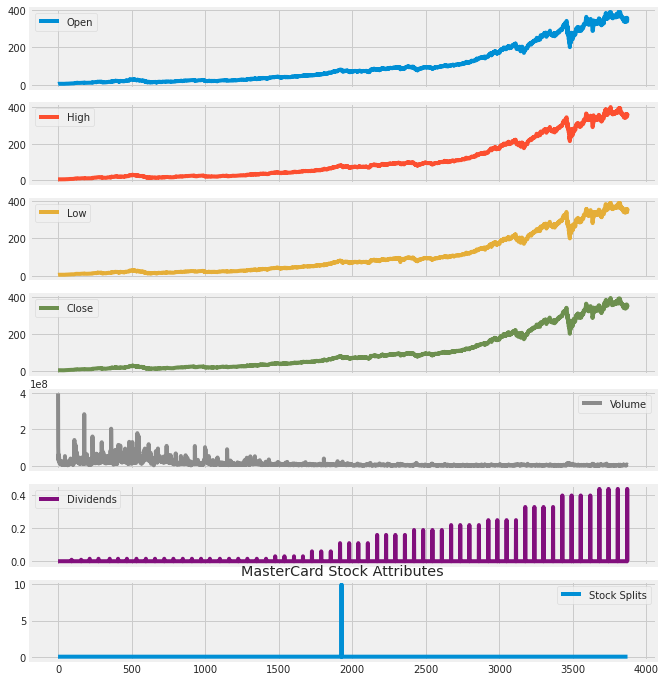

In [4]:
MA_Data.plot(subplots = True, figsize = (10,12))
plt.title('MasterCard Stock Attributes')
plt.show()

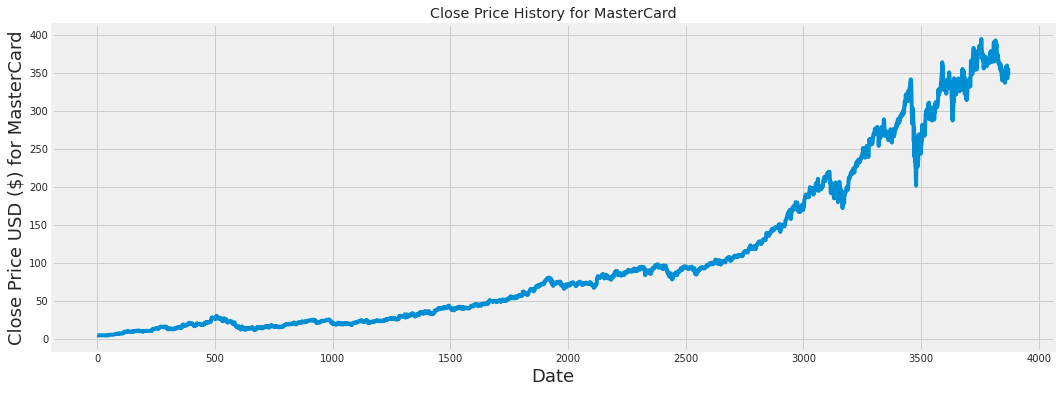

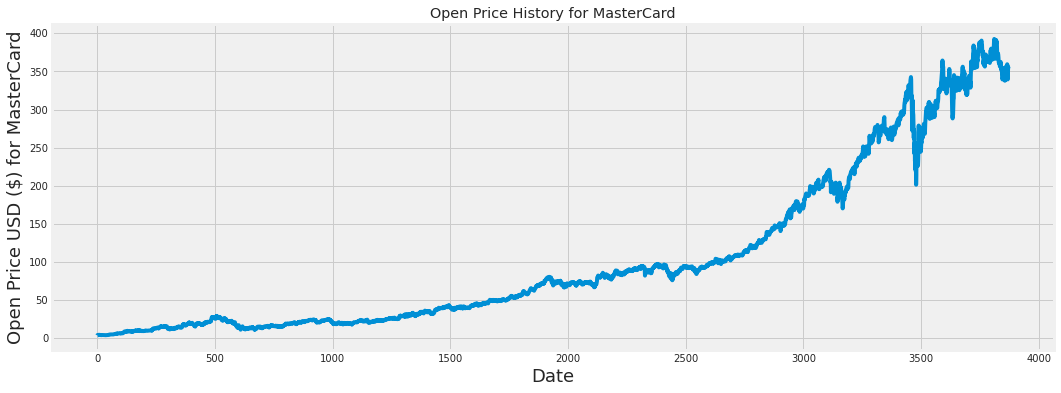

In [5]:
def plot_close_val(data_frame, column, stock):
    plt.figure(figsize=(16,6))
    plt.title(column + ' Price History for ' + stock )
    plt.plot(data_frame[column])
    plt.xlabel('Date', fontsize=18)
    plt.ylabel(column + ' Price USD ($) for ' + stock, fontsize=18)
    plt.show()

#Test the function
plot_close_val(MA_Data, 'Close', 'MasterCard')
plot_close_val(MA_Data, 'Open',  'MasterCard')

# 4. Basic Company Info

In [6]:

ma_info =  pd.read_csv('../input/mastercard-stock-data-latest-and-updated/Mastercard_stock_info.csv', 
                         header=None, 
                         names=(['Description','Information']))
#ma_info.dropna()
ma_info.drop(ma_info.loc[ma_info['Information']=='nan'].index, inplace=True)
ma = ma_info.sort_values('Information').style
ma

<AxesSubplot:>

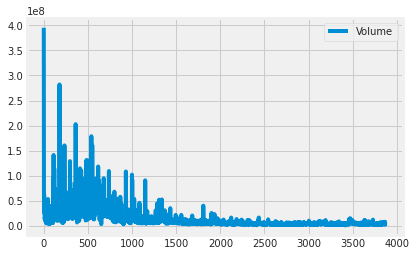

In [7]:
MA_Data[["Volume"]].plot()

# 5. Basic CAGR

In [8]:
MA_Data = pd.read_csv('../input/mastercard-stock-data-latest-and-updated/Mastercard_stock_history.csv', header=0,
                      index_col= 0, names=['Date','Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Splits'], 
                      parse_dates=True)
# Get the number of days in `ma`
days = (MA_Data.index[-1] - MA_Data.index[0]).days

# Calculate the CAGR 
cagr = ((((MA_Data['Close'][-1]) / MA_Data['Close'][1])) ** (365.0/days)) - 1


# Print CAGR
print("The CAGR (Compound Annual Growth Rate) of Mastercard since IPO is " , round((cagr*100),2), "% per year")

The CAGR (Compound Annual Growth Rate) of Mastercard since IPO is  33.26 % per year


## 5.1 Basic Rolling Averages

In [9]:
# Isolate the adjusted closing prices 
adj_close_px = MA_Data['Close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
moving_avg[-10:]

Date
2021-09-28    354.386739
2021-09-29    354.026943
2021-09-30    353.519334
2021-10-01    353.225706
2021-10-04    352.468413
2021-10-05    351.782529
2021-10-06    351.304383
2021-10-07    351.057624
2021-10-08    350.893543
2021-10-11    350.514987
Name: Close, dtype: float64

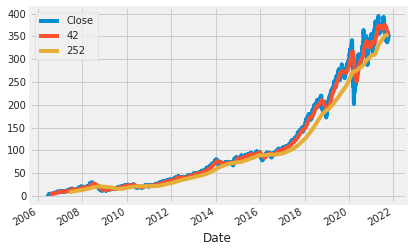

In [10]:
# Short moving window rolling mean
MA_Data['42'] = adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
MA_Data['252'] = adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
MA_Data[['Close', '42', '252']].plot()

plt.show()

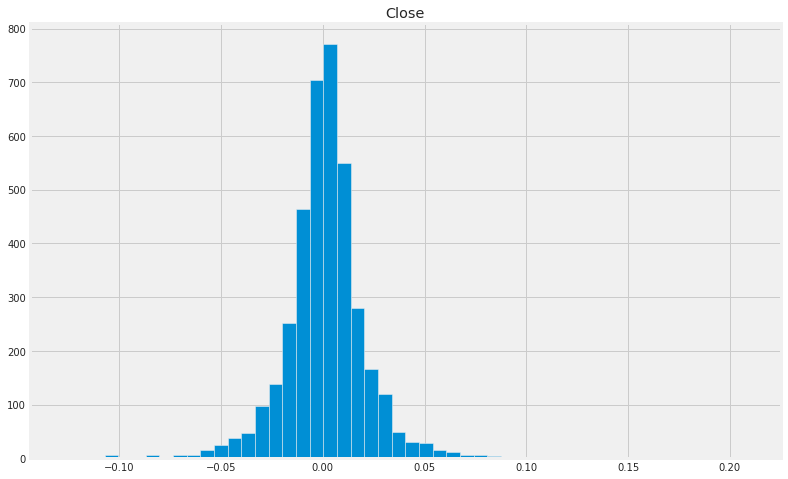

In [11]:
daily_close_px = MA_Data[['Close']]
# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

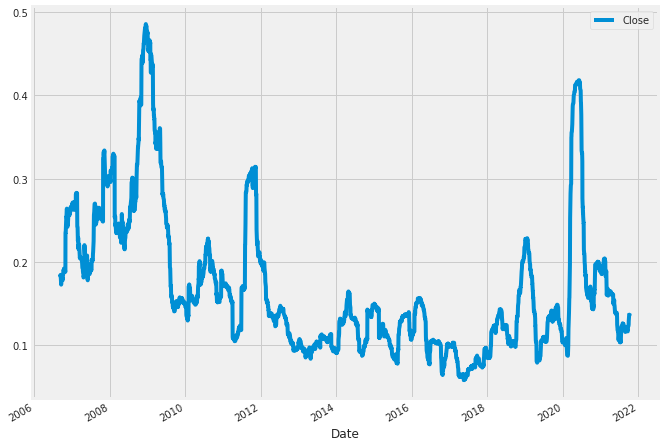

In [12]:
# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()

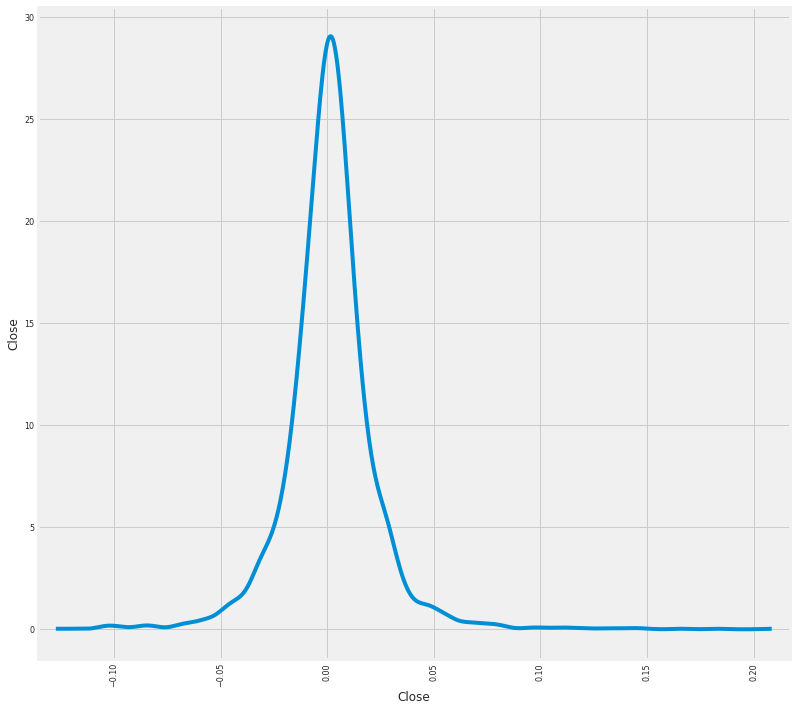

In [13]:
# Plot a scatter matrix with the `daily_pct_change` data 
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

# Show the plot
plt.show()

# 5.2 Basic MACD

In [14]:
import plotly.graph_objects as go

MA_Data=MA_Data.reset_index()

fig = go.Figure(data=go.Ohlc(x=MA_Data['Date'],
        open=MA_Data['Open'],
        high=MA_Data['High'],
        low=MA_Data['Low'],
        close=MA_Data['Close']))
fig.show()

In [15]:
MA_Data=MA_Data.reset_index()

MA_Data['SMA5'] = MA_Data.Close.rolling(5).mean()
MA_Data['SMA20'] = MA_Data.Close.rolling(20).mean()
MA_Data['SMA50'] = MA_Data.Close.rolling(50).mean()
MA_Data['SMA200'] = MA_Data.Close.rolling(200).mean()
MA_Data['SMA500'] = MA_Data.Close.rolling(500).mean()

fig = go.Figure(data=[go.Ohlc(x=MA_Data['Date'],open=MA_Data['Open'],high=MA_Data['High'],low=MA_Data['Low'],close=MA_Data['Close'], name = "OHLC"),
                      go.Scatter(x=MA_Data.Date, y=MA_Data.SMA5, line=dict(color='orange', width=1), name="SMA5"),
                      go.Scatter(x=MA_Data.Date, y=MA_Data.SMA20, line=dict(color='green', width=1), name="SMA20"),
                      go.Scatter(x=MA_Data.Date, y=MA_Data.SMA50, line=dict(color='blue', width=1), name="SMA50"),
                      go.Scatter(x=MA_Data.Date, y=MA_Data.SMA200, line=dict(color='violet', width=1), name="SMA200"),
                      go.Scatter(x=MA_Data.Date, y=MA_Data.SMA500, line=dict(color='purple', width=1), name="SMA500")])
fig.show()

In [16]:
MA_Data['EMA5'] = MA_Data.Close.ewm(span=5, adjust=False).mean()
MA_Data['EMA20'] = MA_Data.Close.ewm(span=20, adjust=False).mean()
MA_Data['EMA50'] = MA_Data.Close.ewm(span=50, adjust=False).mean()
MA_Data['EMA200'] = MA_Data.Close.ewm(span=200, adjust=False).mean()
MA_Data['EMA500'] = MA_Data.Close.ewm(span=500, adjust=False).mean()

fig = go.Figure(data=[go.Ohlc(x=MA_Data['Date'],
                              open=MA_Data['Open'],
                              high=MA_Data['High'],
                              low=MA_Data['Low'],
                              close=MA_Data['Close'], name = "OHLC"),
                      go.Scatter(x=MA_Data.Date, y=MA_Data.SMA5, line=dict(color='orange', width=1), name="EMA5"),
                      go.Scatter(x=MA_Data.Date, y=MA_Data.SMA20, line=dict(color='green', width=1), name="EMA20"),
                      go.Scatter(x=MA_Data.Date, y=MA_Data.SMA50, line=dict(color='blue', width=1), name="EMA50"),
                      go.Scatter(x=MA_Data.Date, y=MA_Data.SMA200, line=dict(color='violet', width=1), name="EMA200"),
                      go.Scatter(x=MA_Data.Date, y=MA_Data.SMA500, line=dict(color='purple', width=1), name="EMA500")])
fig.show()

In [17]:
MA_Data.set_index('Date')

index        Open        High         Low       Close     Volume  \
Date                                                                           
2006-05-25      0    3.748967    4.283869    3.739664    4.279217  395343000   
2006-05-26      1    4.307126    4.348058    4.103398    4.179680  103044000   
2006-05-30      2    4.183400    4.184330    3.986184    4.093164   49898000   
2006-05-31      3    4.125723    4.219679    4.125723    4.180608   30002000   
2006-06-01      4    4.179678    4.474572    4.176887    4.419686   62344000   
...           ...         ...         ...         ...         ...        ...   
2021-10-05   3867  347.121403  348.130138  342.497241  342.776886    4724100   
2021-10-06   3868  339.580960  348.439763  338.682072  348.250000    3712000   
2021-10-07   3869  349.000000  357.899994  349.000000  353.910004    3209200   
2021-10-08   3870  356.000000  360.369995  354.209991  354.959991    2336700   
2021-10-11   3871  353.950012  354.880005  346.899994  347.149994    2766800   

            Dividends  Splits          42         252        SMA5       SMA20  \
Date                                                                            
2006-05-25       0.00     0.0         NaN         NaN         NaN         NaN   
2006-05-26       0.00     0.0         NaN         NaN         NaN         NaN   
2006-05-30       0.00     0.0         NaN         NaN         NaN         NaN   
2006-05-31       0.00     0.0         NaN         NaN         NaN         NaN   
2006-06-01       0.00     0.0         NaN         NaN    4.230471         NaN   
...               ...     ...         ...         ...         ...         ...   
2021-10-05       0.00     0.0  351.782529  353.264527  349.250726  347.894441   
2021-10-06       0.00     0.0  351.304383  353.315549  348.351862  347.777089   
2021-10-07       0.44     0.0  351.057624  353.363513  349.685608  347.924261   
2021-10-08       0.00     0.0  350.893543  353.409127  348.732507  348.324678   
2021-10-11       0.00     0.0  350.514987  353.395159  349.409375  348.313123   

                 SMA50      SMA200      SMA500        EMA5       EMA20  \
Date                                                                     
2006-05-25         NaN         NaN         NaN    4.279217    4.279217   
2006-05-26         NaN         NaN         NaN    4.246038    4.269737   
2006-05-30         NaN         NaN         NaN    4.195080    4.252921   
2006-05-31         NaN         NaN         NaN    4.190256    4.246034   
2006-06-01         NaN         NaN         NaN    4.266733    4.262572   
...                ...         ...         ...         ...         ...   
2021-10-05  356.860313  359.588689  324.678704  347.753324  349.375773   
2021-10-06  356.029763  359.636595  324.829022  347.918882  349.268556   
2021-10-07  355.448840  359.742456  324.989730  349.915923  349.710599   
2021-10-08  354.781653  359.864165  325.148223  351.597279  350.210541   
2021-10-11  354.015593  359.961801  325.291669  350.114851  349.919060   

                 EMA50      EMA200      EMA500  
Date                                            
2006-05-25    4.279217    4.279217    4.279217  
2006-05-26    4.275314    4.278227    4.278820  
2006-05-30    4.268171    4.276385    4.278079  
2006-05-31    4.264737    4.275432    4.277690  
2006-06-01    4.270813    4.276868    4.278256  
...                ...         ...         ...  
2021-10-05  354.931623  354.580376  323.751065  
2021-10-06  354.669598  354.517387  323.848865  
2021-10-07  354.639810  354.511343  323.968870  
2021-10-08  354.652366  354.515807  324.092587  
2021-10-11  354.358156  354.442516  324.184632  

[3872 rows x 20 columns]

# 6.ARIMA

In [18]:
MA_Data = MA_Data.set_index('Date')
MA_Data.index
x = MA_Data['Open'].resample('MS').mean()
x.head()

Date
2006-05-01    4.091304
2006-06-01    4.349791
2006-07-01    4.267356
2006-08-01    4.928380
2006-09-01    5.859737
Freq: MS, Name: Open, dtype: float64

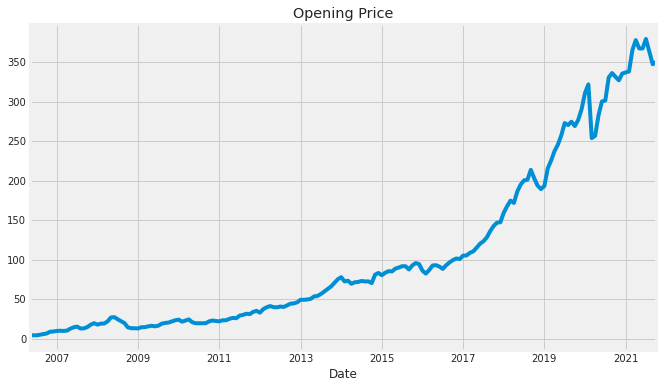

In [19]:
#visualize time series of open price
x.plot(figsize = (10,6))
plt.title("Opening Price")
plt.show()

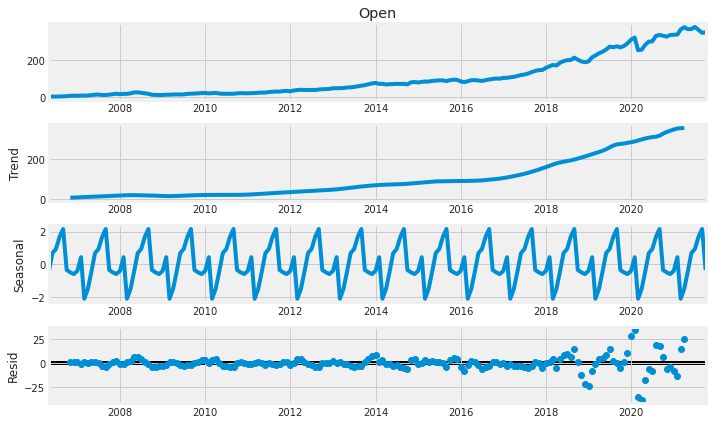

In [20]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 10,6
decomposition = sm.tsa.seasonal_decompose(x, model = 'additive')
fig = decomposition.plot()
plt.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

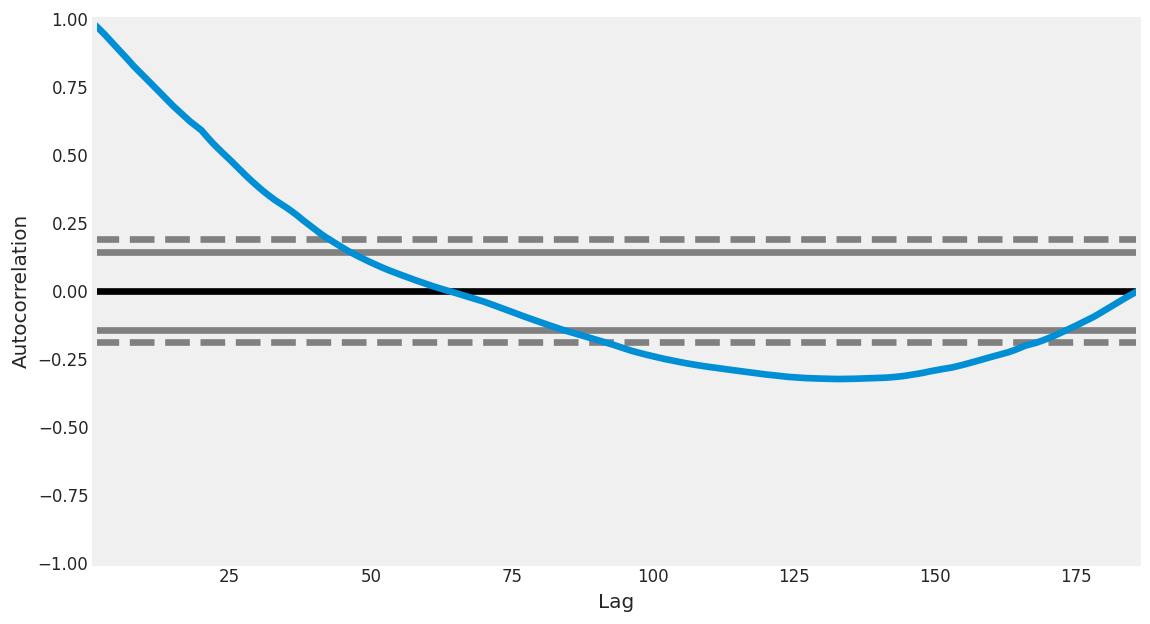

In [21]:
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, kpss
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(x.tolist())

In [22]:
import warnings
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [23]:
#selection of parameter
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(x, order = param, seasonal_order = param_seasonal, enforce_stationarity = False,
                                            enforce_invertibility = False)
            results = model.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
                continue

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.39779D+00    |proj g|=  3.58114D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      3      1     0     0   1.066D-09   6.398D+00
  F =   6.3977815476363498     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2381.974735720722
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variable

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1734.8516826516266
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.39397D+00    |proj g|=  5.47688D-01

At iterate    5    f=  4.24470D+00    |proj g|=  4.89119D-02

At iterate   10    f=  4.19197D+00    |proj g|=  7.02660D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     14     16      1     0     0   6.924D-07   4.192D+00
  F =   4.1919101362536679     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)

 This problem is unconstrained.
 This problem is unconstrained.
/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate   10    f=  4.05088D+00    |proj g|=  1.08889D-01

At iterate   15    f=  4.03970D+00    |proj g|=  1.86454D+00

At iterate   20    f=  4.00135D+00    |proj g|=  4.85927D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     34      1     0     0   2.995D-05   4.001D+00
  F =   4.0006590045193215     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1494.2451496811877
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.96439D+00    |proj g|=  9.99587D-03

At iterate   10    f=  3.96109D+00    |proj g|=  1.18104D-01

At iterate   15    f=  3.93286D+00    |proj g|=  2.20028D-02

At iterate   20    f=  3.93275D+00    |proj g|=  1.33362D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     28      1     0     0   1.334D-05   3.933D+00
  F =   3.9327463748797591     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1468.9816514552704
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  4.91806D+00    |proj g|=  3.29687D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     31      1     0     0   1.859D-06   4.918D+00
  F =   4.9180623740294243     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1835.5192031389458
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.35312D+00    |proj g|=  5.69184D-01

At iterate    5    f=  4.29049D+00    |proj g|=  1.66564D-02

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  3.76936D+00    |proj g|=  2.70516D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     22      1     0     0   8.876D-07   3.769D+00
  F =   3.7693541721762327     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1408.1997520495586
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.67132D+00    |proj g|=  8.05744D-01

At iterate    5    f=  5.55818D+00    |proj g|=  6.14179D-03

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.47213D+00    |proj g|=  3.20550D-02
  ys=-1.399E-02  -gs= 7.245E-01 BFGS update SKIPPED

At iterate   15    f=  4.02268D+00    |proj g|=  1.08251D+00

At iterate   20    f=  3.65519D+00    |proj g|=  1.89894D+00

At iterate   25    f=  3.62451D+00    |proj g|=  1.74179D-02

At iterate   30    f=  3.62442D+00    |proj g|=  6.27793D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     30     50      1     1     0   6.278D-04   3.624D+00
  F =   3.6244247895981943     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1356.2860217305283
RUNNI

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  3.74963D+00    |proj g|=  5.63388D-02

At iterate   15    f=  3.74527D+00    |proj g|=  3.58433D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     19      1     0     0   3.584D-06   3.745D+00
  F =   3.7452731504381864     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1399.2416119630054
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.13658D+00    |proj g|=  5.20044D-01

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.19753D+00    |proj g|=  2.04161D-01

At iterate    5    f=  3.16561D+00    |proj g|=  1.32087D-01

At iterate   10    f=  3.12165D+00    |proj g|=  1.12005D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     14     17      1     0     0   2.500D-06   3.122D+00
  F =   3.1215144481051786     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1165.2033746951265
RUNNING THE L-

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:1170.4308903663532
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.11862D+00    |proj g|=  5.28816D-02

At iterate    5    f=  3.09384D+00    |proj g|=  1.72760D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     12      1     0     0   6.986D-06   3.091D+00
  F =   3.0908123191302637     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1155.782182716458
RUNNING THE L-BFGS-B 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.60103D+00    |proj g|=  3.17642D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     11      1     0     0   6.933D-07   3.601D+00
  F =   3.6010192941936743     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:1343.5791774400468
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.19266D+00    |proj g|=  2.23761D-01

At iterate    5    f=  3.15816D+00    |proj g|=  1.19191D-01

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.08555D+00    |proj g|=  1.25738D-01

At iterate   10    f=  3.07058D+00    |proj g|=  1.27959D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     15      1     0     0   2.319D-06   3.071D+00
  F =   3.0705839503630186     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:1150.2572295350428
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.46964D+00    |proj g|=  1.74095D-03

           * 

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   15    f=  3.34508D+00    |proj g|=  3.43446D-01

At iterate   20    f=  3.31261D+00    |proj g|=  5.90226D-02

At iterate   25    f=  3.29817D+00    |proj g|=  3.40834D-01

At iterate   30    f=  3.28960D+00    |proj g|=  6.63769D-02

At iterate   35    f=  3.28450D+00    |proj g|=  1.02674D-01

At iterate   40    f=  3.28180D+00    |proj g|=  1.19522D-01

At iterate   45    f=  3.28041D+00    |proj g|=  1.34601D-01

At iterate   50    f=  3.27930D+00    |proj g|=  1.18861D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     50     76      1     0     0   1.189D-01   3.279D+00
  F =   3.27930329279

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.20953D+00    |proj g|=  4.72598D-02

At iterate   10    f=  3.20404D+00    |proj g|=  6.38073D-01

At iterate   15    f=  3.13370D+00    |proj g|=  3.80981D-01

At iterate   20    f=  3.13192D+00    |proj g|=  4.47331D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     25      1     0     0   4.473D-05   3.132D+00
  F =   3.1319200745347460     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:1171.0742677269254
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.67097D+00    |proj g|=  1.27334D+00

At iterate   10    f=  3.25139D+00    |proj g|=  1.06271D+00

At iterate   15    f=  3.24999D+00    |proj g|=  1.03689D-01

At iterate   20    f=  3.24754D+00    |proj g|=  3.13937D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     31      1     0     0   3.095D-04   3.248D+00
  F =   3.2475178165517193     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:1214.0766277572395
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  3.13505D+00    |proj g|=  4.41753D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     23      1     0     0   3.495D-05   3.135D+00
  F =   3.1350361460816272     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:1172.2334463423654
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45630D+00    |proj g|=  3.14732D-01

At iterate    5    f=  3.19458D+00    |proj g|=  5.39025D-01

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  3.22774D+00    |proj g|=  5.80693D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     34      1     0     0   6.341D-05   3.228D+00
  F =   3.2277445478283506     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1208.7209717921464
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.60224D+00    |proj g|=  5.30052D-02

At iterate    5    f=  3.59928D+00    |proj g|=  1.60323D-03

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  3.17514D+00    |proj g|=  8.07410D-02

At iterate   15    f=  3.11630D+00    |proj g|=  7.37655D-01

At iterate   20    f=  3.10733D+00    |proj g|=  3.63751D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     29      1     0     0   5.305D-06   3.107D+00
  F =   3.1073313645469067     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1163.9272676114492
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  3.27011D+00    |proj g|=  1.38292D+00

At iterate   15    f=  3.22710D+00    |proj g|=  1.37360D-01

At iterate   20    f=  3.22613D+00    |proj g|=  3.28352D-03

At iterate   25    f=  3.22603D+00    |proj g|=  2.35201D-02

At iterate   30    f=  3.22595D+00    |proj g|=  2.20130D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     40      1     0     0   1.257D-04   3.226D+00
  F =   3.2259533502656543     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1210.0546462988234
RUNNING THE L-BFGS-B CODE

           * * *

Machine prec

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  3.17947D+00    |proj g|=  8.19734D-02

At iterate   15    f=  3.13459D+00    |proj g|=  8.55402D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     21      1     0     0   2.299D-05   3.135D+00
  F =   3.1345857137231978     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:1174.0658855050297
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.42129D+00    |proj g|=  2.86533D-01

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  3.11650D+00    |proj g|=  8.39206D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     18      1     0     0   1.831D-06   3.116D+00
  F =   3.1164328520905382     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1165.3130209776803
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.26540D+00    |proj g|=  2.01243D-02

At iterate    5    f=  3.26455D+00    |proj g|=  1.94702D-03

           * 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1222.1261591316602
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.18266D+00    |proj g|=  3.64791D-02

At iterate    5    f=  3.11884D+00    |proj g|=  1.31965D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     14      1     0     0   1.248D-06   3.118D+00
  F =   3.1184795329354591     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:1166.0743862519907
RUNNING THE L-BFGS-B

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     16      1     0     0   2.222D-06   3.089D+00
  F =   3.0892296783278752     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1157.1934403379696
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.45224D+00    |proj g|=  1.65941D-01

At iterate    5    f=  3.44288D+00    |proj g|=  6.21800D-03

At iterate   10    f=  3.44285D+00    |proj g|=  1.54799D-04

           * 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  3.24075D+00    |proj g|=  5.50236D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     21      1     0     0   2.622D-05   3.241D+00
  F =   3.2407460060417845     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1213.5575142475438
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.59733D+00    |proj g|=  7.97525D-02

At iterate    5    f=  3.59015D+00    |proj g|=  1.07438D-02

At iterate   

 This problem is unconstrained.



At iterate   10    f=  3.09494D+00    |proj g|=  2.07309D-02

At iterate   15    f=  3.08717D+00    |proj g|=  8.13763D-03

At iterate   20    f=  3.08714D+00    |proj g|=  1.61873D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     26      1     0     0   1.292D-06   3.087D+00
  F =   3.0871355019076754     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1156.4144067096552
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.25652D+00    |proj g|=  1.62944D-02

At iterate   10    f=  3.25632D+00    |proj g|=  3.10144D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     17      1     0     0   1.654D-06   3.256D+00
  F =   3.2563116883759955     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:1219.3479480758704
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.25220D+00    |proj g|=  1.84955D-01

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  3.06942D+00    |proj g|=  3.98967D-02

At iterate   15    f=  3.06763D+00    |proj g|=  2.99902D-03

At iterate   20    f=  3.06761D+00    |proj g|=  1.08122D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     22      1     0     0   1.081D-05   3.068D+00
  F =   3.0676131983759833     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1151.1521097958657


In [24]:
#fitting model
model = sm.tsa.statespace.SARIMAX(x, order = (1, 1, 1), seasonal_order = (1, 1, 0, 12), enforce_stationarity = False,
                                enforce_invertibility = False)
result = model.fit()
print(results.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.18487D+00    |proj g|=  5.38027D-02

At iterate    5    f=  3.14200D+00    |proj g|=  1.62664D-01

At iterate   10    f=  3.11807D+00    |proj g|=  4.87199D-04

At iterate   15    f=  3.11803D+00    |proj g|=  1.02956D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     19      1     0     0   7.939D-06   3.118D+00
  F =   3.1180334483648839     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
        

 This problem is unconstrained.


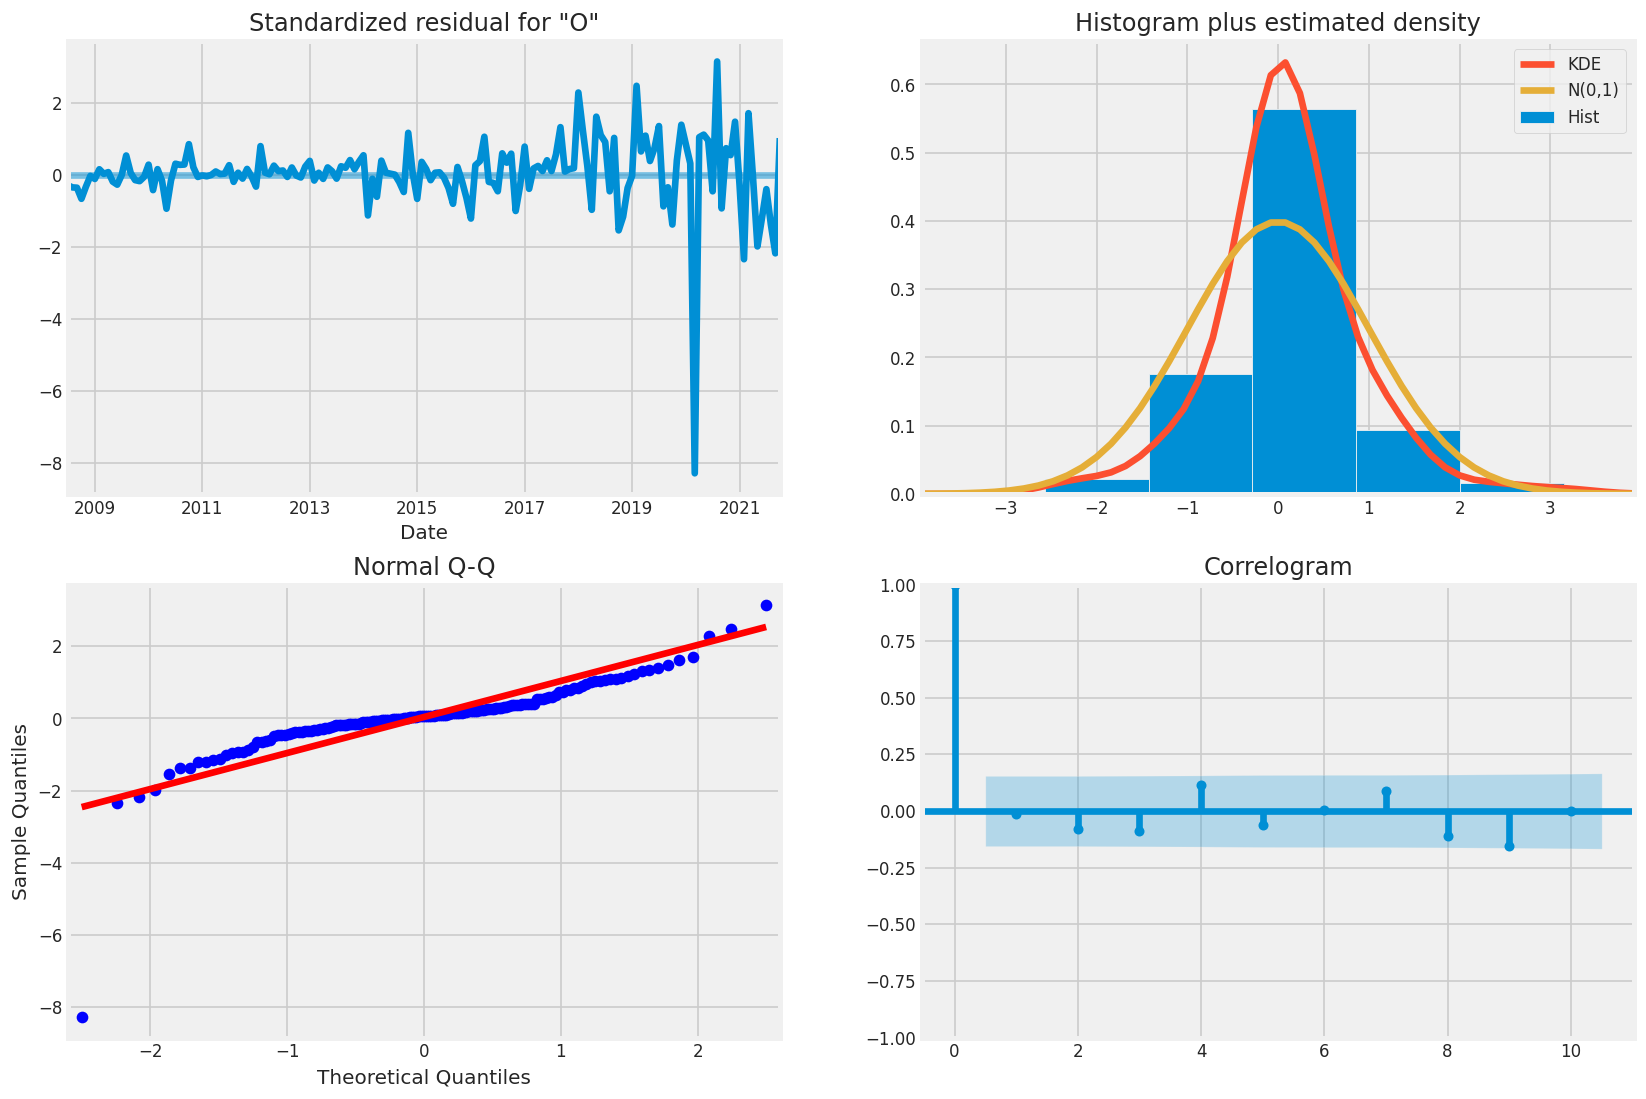

In [25]:
result.plot_diagnostics(figsize = (15, 11))
plt.show()

In [26]:
y_pred = result.get_prediction(start = pd.to_datetime('2019-01-01'), dynamic = False)
pred_ci = y_pred.conf_int()
print(pred_ci)

            lower Open  upper Open
Date                              
2019-01-01  175.862925  211.444915
2019-02-01  175.480362  211.062352
2019-03-01  202.037520  237.619511
2019-04-01  209.957098  245.539088
2019-05-01  224.621252  260.203242
2019-06-01  233.095828  268.677818
2019-07-01  242.999324  278.581315
2019-08-01  260.779030  296.361021
2019-09-01  260.185252  295.767242
2019-10-01  264.026128  299.608118
2019-11-01  255.783133  291.365124
2019-12-01  260.342546  295.924537
2020-01-01  285.658271  321.240261
2020-02-01  301.454064  337.036054
2020-03-01  311.390772  346.972763
2020-04-01  229.805139  265.387129
2020-05-01  255.188150  290.770141
2020-06-01  274.039029  309.621020
2020-07-01  288.048316  323.630306
2020-08-01  284.568777  320.150767
2020-09-01  327.108480  362.690470
2020-10-01  307.151730  342.733720
2020-11-01  304.518066  340.100056
2020-12-01  304.652178  340.234169
2021-01-01  321.903743  357.485733
2021-02-01  341.905687  377.487677
2021-03-01  332.3531

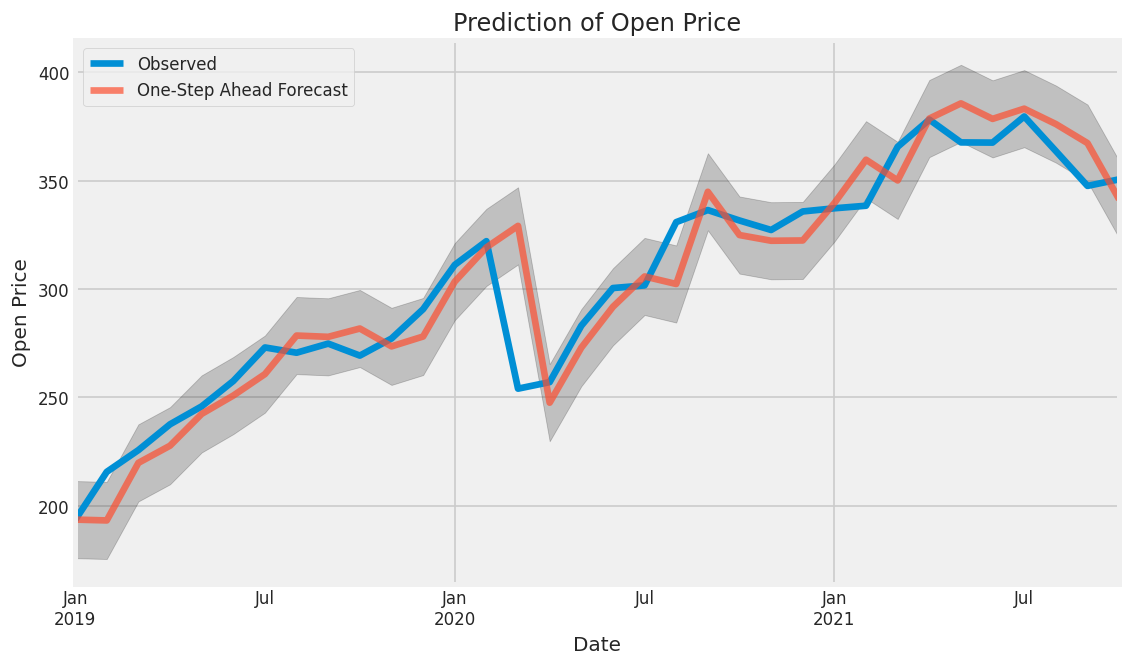

In [27]:
#visualize prediction of open price
ax = x['2019':].plot(label = 'Observed')
y_pred.predicted_mean.plot(ax = ax, label = 'One-Step Ahead Forecast', alpha = .7, figsize = (10, 6))
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = .2)
plt.title("Prediction of Open Price")
ax.set_xlabel('Date')
ax.set_ylabel('Open Price')
plt.legend()
plt.show()

In [28]:
#prediction of forecast
y_forecasted = y_pred.predicted_mean
y_truth = x['2019-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 298.82
The Root Mean Squared Error of our forecasts is 17.29


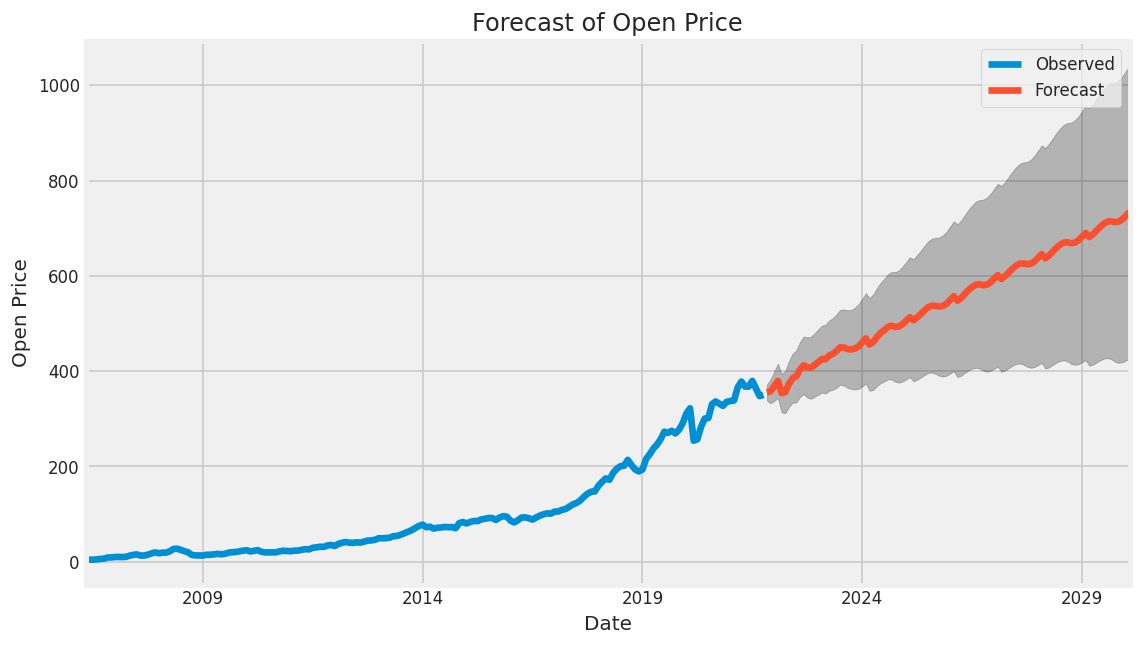

In [29]:
#visualize prediction of forecast
pred_uc = results.get_forecast(steps = 100)
pred_ci = pred_uc.conf_int()
ax = x.plot(label = 'Observed', figsize = (10,6))
pred_uc.predicted_mean.plot(ax = ax, label = 'Forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = .25)
plt.title("Forecast of Open Price")
ax.set_xlabel('Date')
ax.set_ylabel('Open Price')
plt.legend()
plt.show()

# 6.1 ADF Tests

In [30]:
# ADF Test
result = adfuller(x, autolag = 'AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(x, regression = 'c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 3.3086672480717088
p-value: 1.0
Critial Values:
   1%, -3.4672111510631
Critial Values:
   5%, -2.877734766803841
Critial Values:
   10%, -2.575403364197531

KPSS Statistic: 1.078745
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1907: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




# 7 FINTA Tech Analysis Ratios

## Let us do a financial ratios calculation using FINTA library
* Simple Moving Average 'SMA'
* Simple Moving Median 'SMM'
* Smoothed Simple Moving Average 'SSMA'
* Exponential Moving Average 'EMA'
* Double Exponential Moving Average 'DEMA'
* Triple Exponential Moving Average 'TEMA'
* Triangular Moving Average 'TRIMA'
* Triple Exponential Moving Average Oscillator 'TRIX'
* Volume Adjusted Moving Average 'VAMA'
* Kaufman Efficiency Indicator 'ER'
* Kaufman's Adaptive Moving Average 'KAMA'
* Zero Lag Exponential Moving Average 'ZLEMA'
* Weighted Moving Average 'WMA'
* Hull Moving Average 'HMA'
* Elastic Volume Moving Average 'EVWMA'
* Volume Weighted Average Price 'VWAP'
* Smoothed Moving Average 'SMMA'
* Fractal Adaptive Moving Average 'FRAMA'
* Moving Average Convergence Divergence 'MACD'
* Percentage Price Oscillator 'PPO'
* Volume-Weighted MACD 'VW_MACD'
* Elastic-Volume weighted MACD 'EV_MACD'
* Market Momentum 'MOM'
* Rate-of-Change 'ROC'
* Relative Strenght Index 'RSI'
* Inverse Fisher Transform RSI 'IFT_RSI'
* True Range 'TR'
* Average True Range 'ATR'
* Stop-and-Reverse 'SAR'
* Bollinger Bands 'BBANDS'
* Bollinger Bands Width 'BBWIDTH'
* Momentum Breakout Bands 'MOBO'
* Percent B 'PERCENT_B'
* Keltner Channels 'KC'
* Donchian Channel 'DO'
* Directional Movement Indicator 'DMI'
* Average Directional Index 'ADX'
* Pivot Points 'PIVOT'
* Fibonacci Pivot Points 'PIVOT_FIB'
* Stochastic Oscillator %K 'STOCH'
* Stochastic oscillator %D 'STOCHD'
* Stochastic RSI 'STOCHRSI'
* Williams %R 'WILLIAMS'
* Ultimate Oscillator 'UO'
* Awesome Oscillator 'AO'
* Mass Index 'MI'
* Vortex Indicator 'VORTEX'
* Know Sure Thing 'KST'
* True Strength Index 'TSI'
* Typical Price 'TP'
* Accumulation-Distribution Line 'ADL'
* Chaikin Oscillator 'CHAIKIN'
* Money Flow Index 'MFI'
* On Balance Volume 'OBV'
* Weighter OBV 'WOBV'
* Volume Zone Oscillator 'VZO'
* Price Zone Oscillator 'PZO'
* Elder's Force Index 'EFI'
* Cummulative Force Index 'CFI'
* Bull power and Bear Power 'EBBP'
* Ease of Movement 'EMV'
* Commodity Channel Index 'CCI'
* Coppock Curve 'COPP'
* Buy and Sell Pressure 'BASP'
* Normalized BASP 'BASPN'
* Chande Momentum Oscillator 'CMO'
* Chandelier Exit 'CHANDELIER'
* Qstick 'QSTICK'
* Twiggs Money Index 'TMF'
* Wave Trend Oscillator 'WTO'
* Fisher Transform 'FISH'
* Ichimoku Cloud 'ICHIMOKU'
* Adaptive Price Zone 'APZ'
* Squeeze Momentum Indicator 'SQZMI'
* Volume Price Trend 'VPT'
* Finite Volume Element 'FVE'
* Volume Flow Indicator 'VFI'
* Moving Standard deviation 'MSD'
* Schaff Trend Cycle 'STC'

In [31]:
try:
    from finta import TA
    from backtesting import Backtest, Strategy
    from backtesting.lib import crossover
except:
    !pip install finta backtesting
    from finta import TA
    from backtesting import Backtest, Strategy
    from backtesting.lib import crossover

     |████████████████████████████████| 175 kB 7.0 MB/s 
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173823 sha256=5893efb448b10e322fc5a054c7f1f478324a2afe5824f6b4b9d945261acf2d4b
  Stored in directory: /root/.cache/pip/wheels/48/1d/ea/65dacebc37da7655d8a1fd0f315ac39d102e31d6545237a1c6
Successfully built backtesting


Loading BokehJS ...

In [32]:
fin_ma = pd.read_csv('../input/mastercard-stock-data-latest-and-updated/Mastercard_stock_history.csv', index_col="Date", parse_dates=True)
print(fin_ma.head())
ohlc=fin_ma
print(TA.SMA(ohlc, 42))

                Open      High       Low     Close     Volume  Dividends  \
Date                                                                       
2006-05-25  3.748967  4.283869  3.739664  4.279217  395343000        0.0   
2006-05-26  4.307126  4.348058  4.103398  4.179680  103044000        0.0   
2006-05-30  4.183400  4.184330  3.986184  4.093164   49898000        0.0   
2006-05-31  4.125723  4.219679  4.125723  4.180608   30002000        0.0   
2006-06-01  4.179678  4.474572  4.176887  4.419686   62344000        0.0   

            Stock Splits  
Date                      
2006-05-25           0.0  
2006-05-26           0.0  
2006-05-30           0.0  
2006-05-31           0.0  
2006-06-01           0.0  
Date
2006-05-25           NaN
2006-05-26           NaN
2006-05-30           NaN
2006-05-31           NaN
2006-06-01           NaN
                 ...    
2021-10-05    352.751685
2021-10-06    352.137224
2021-10-07    351.749075
2021-10-08    351.453460
2021-10-11    351.05749

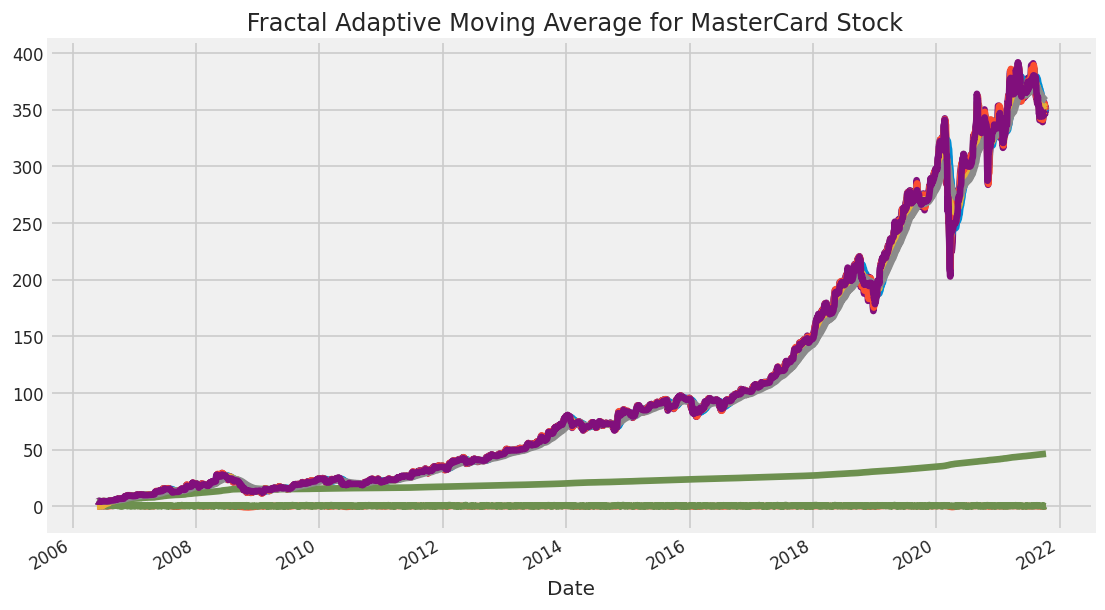

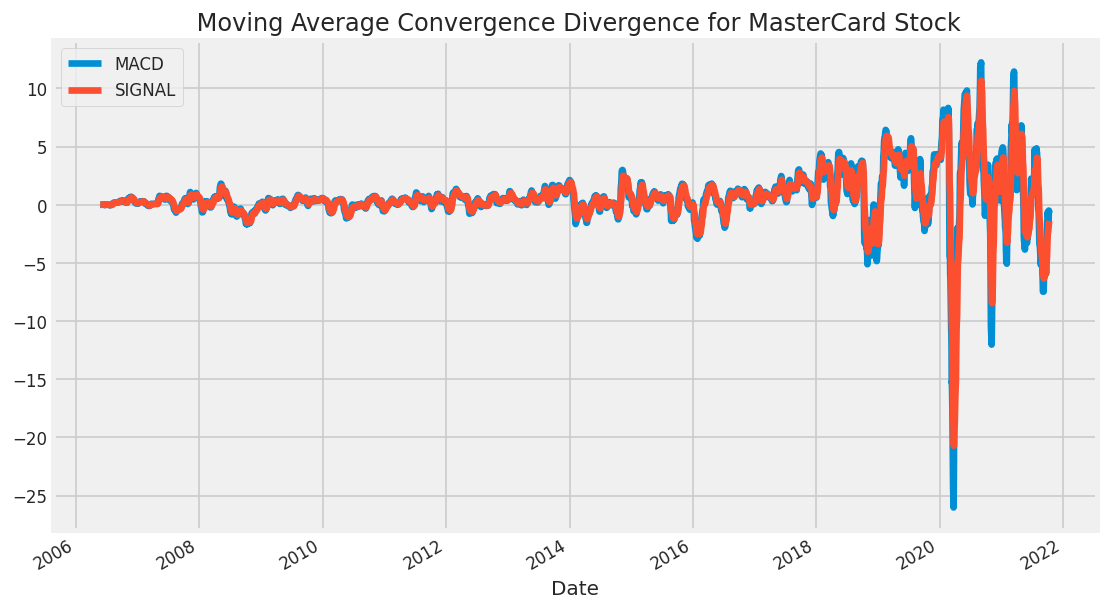

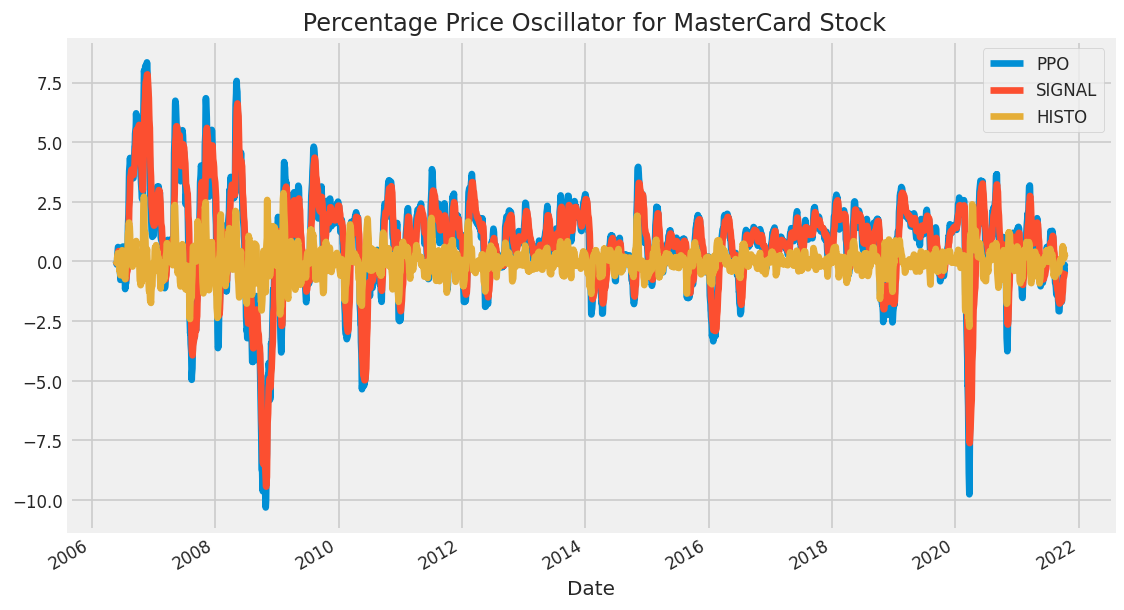

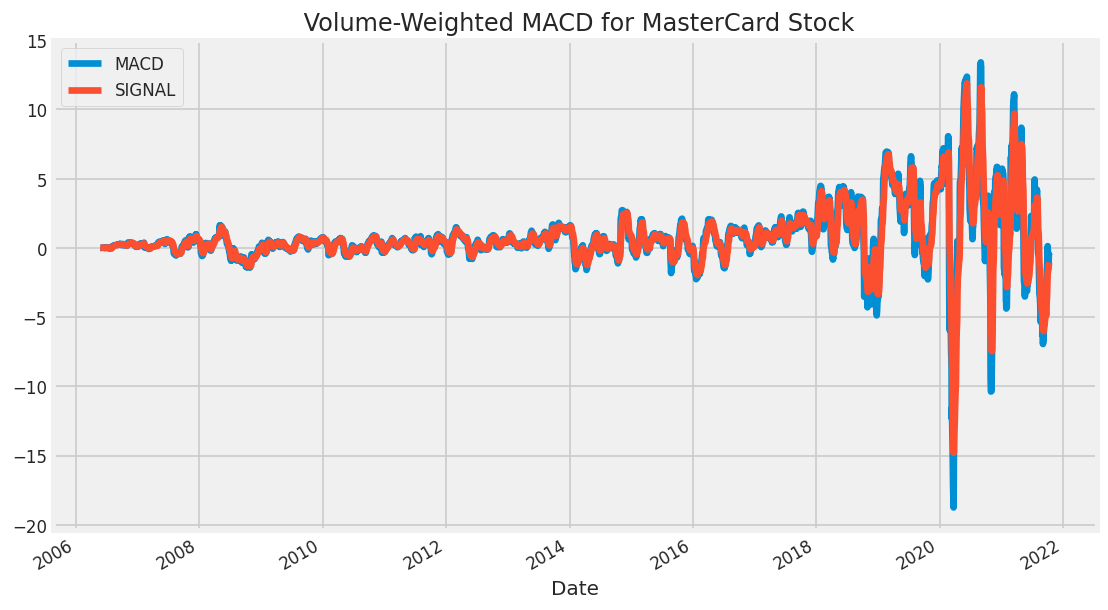

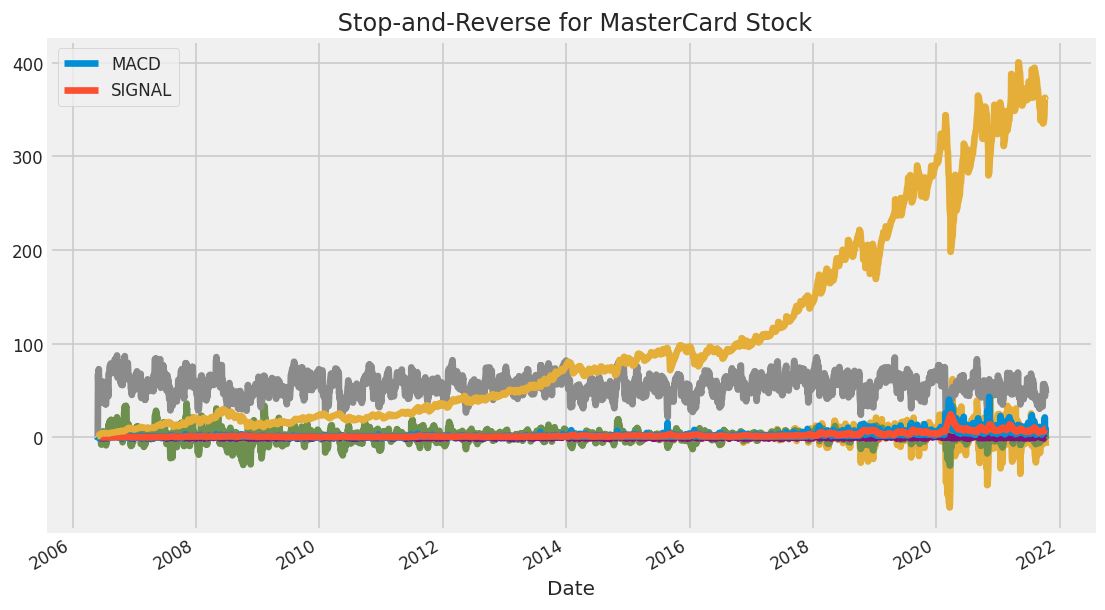

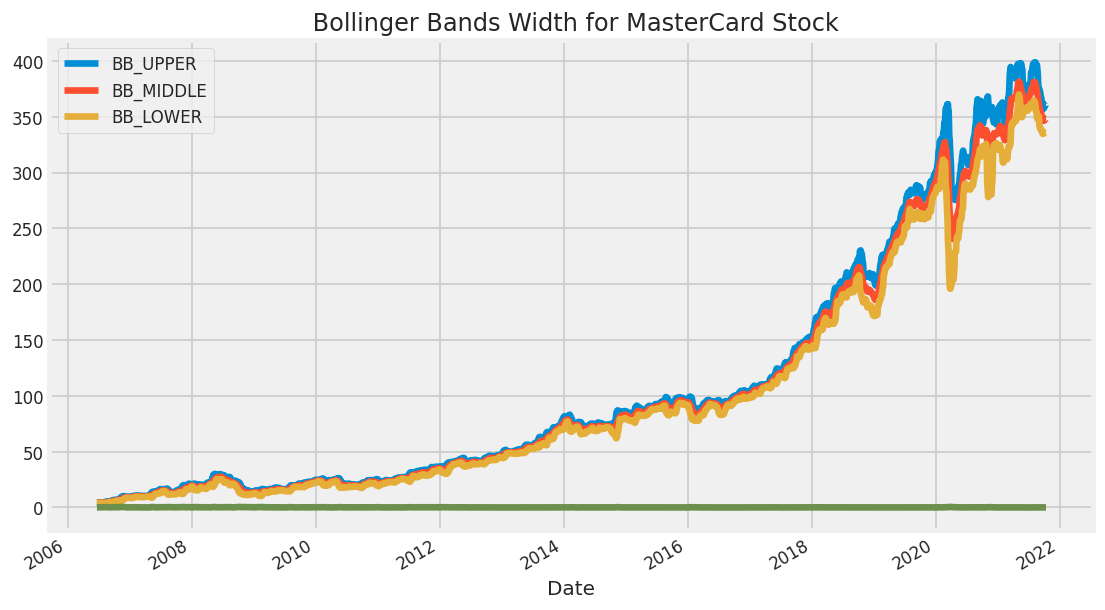

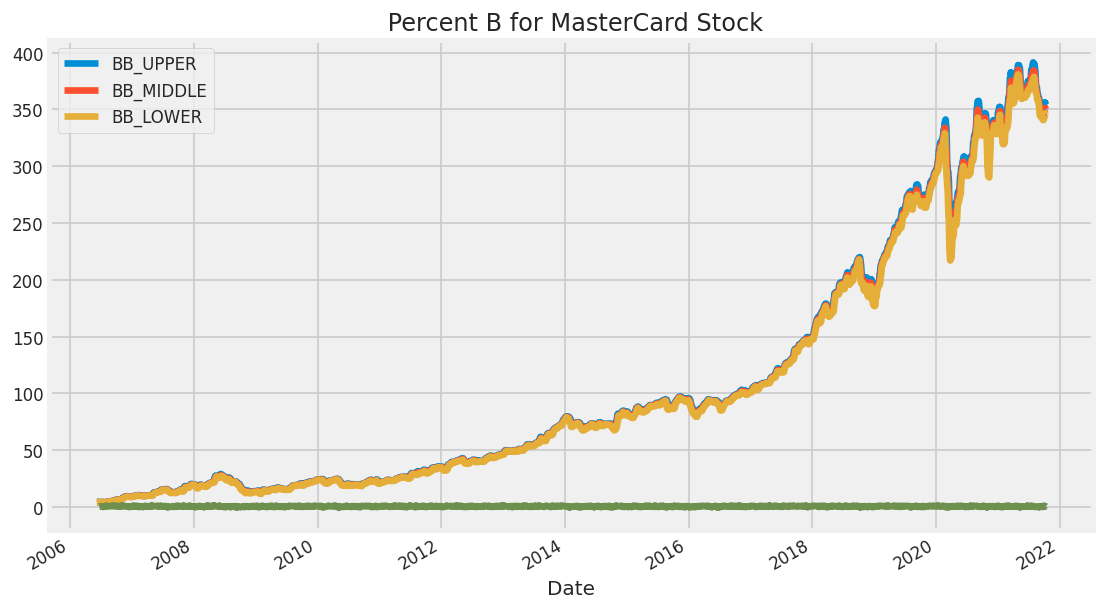

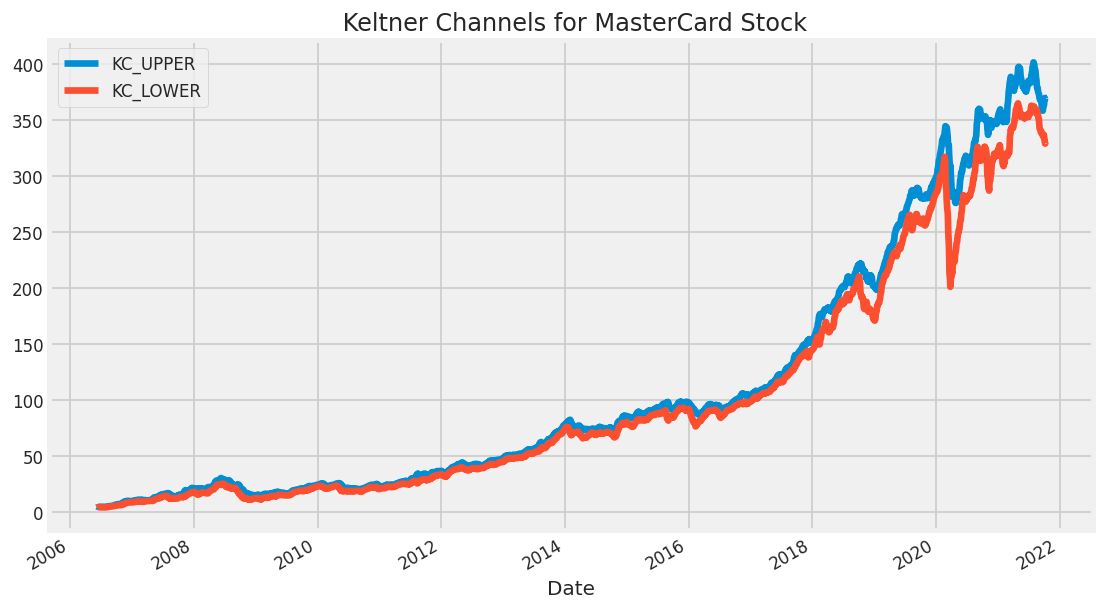

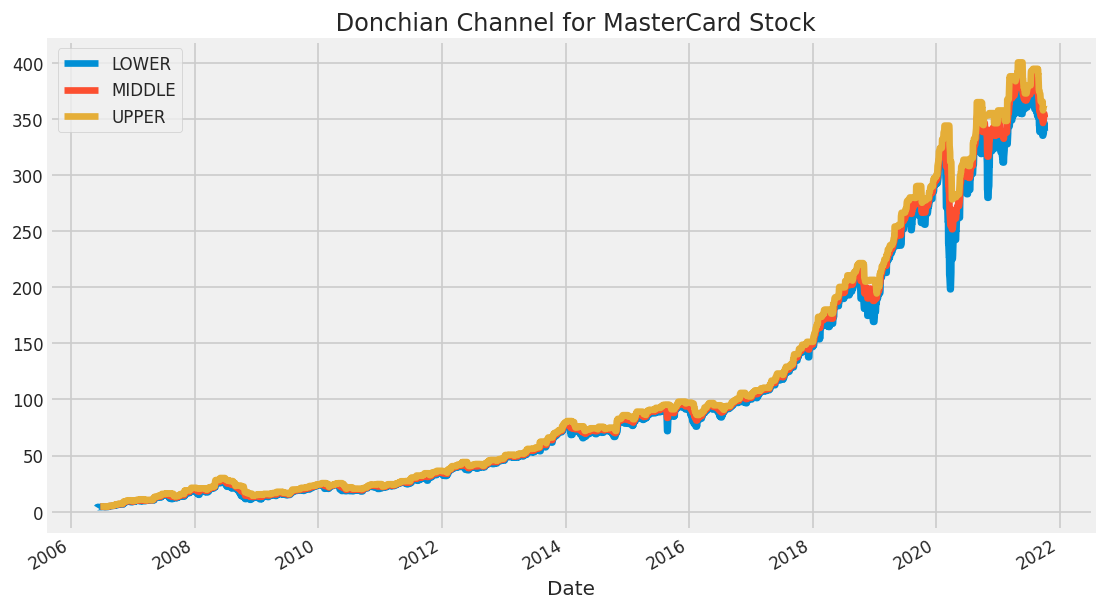

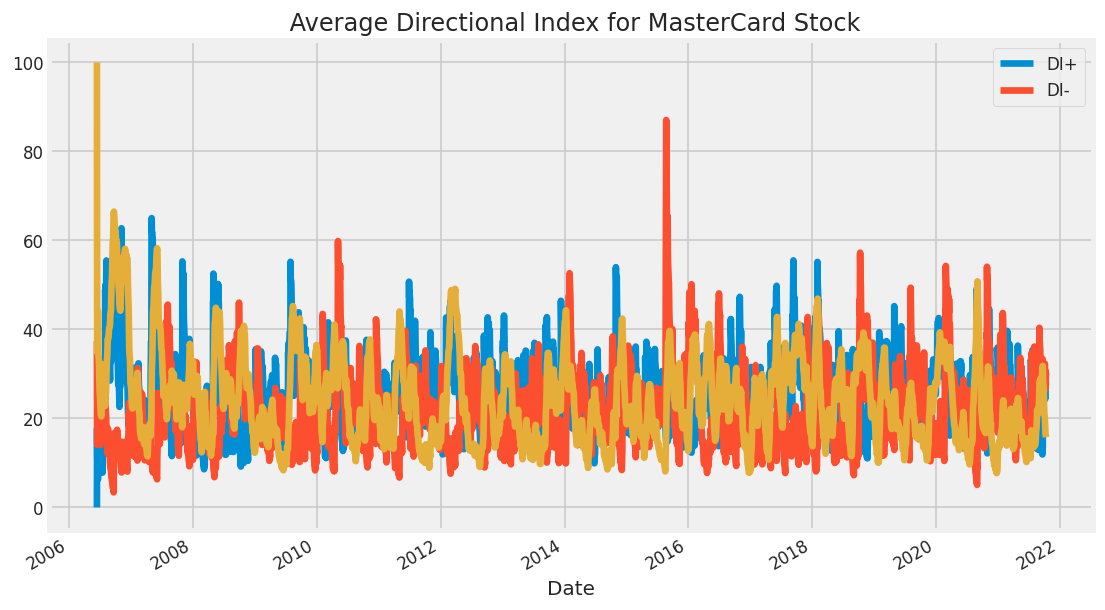

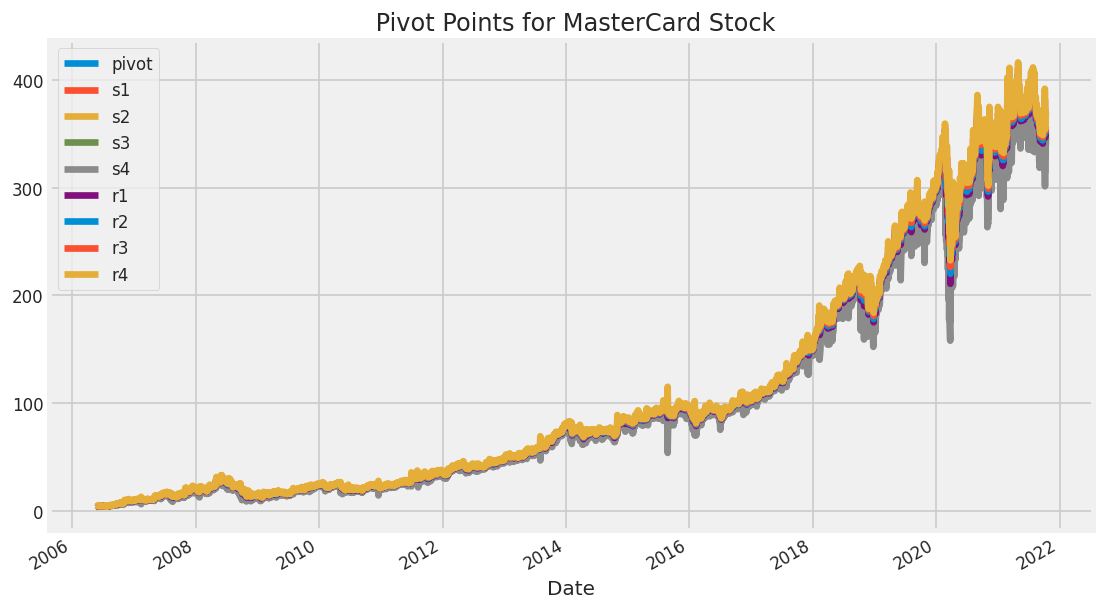

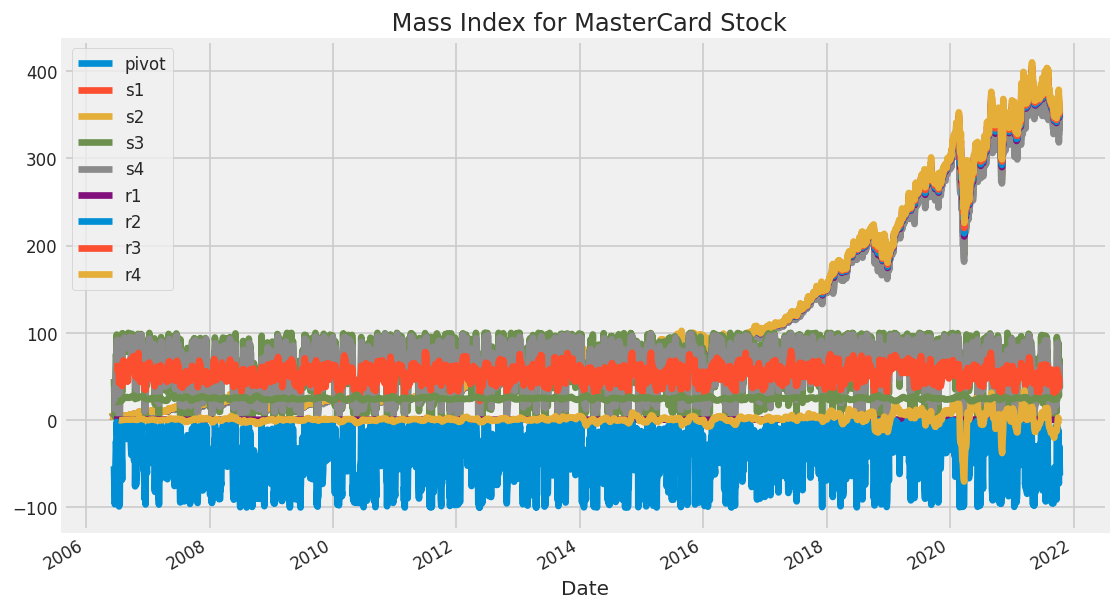

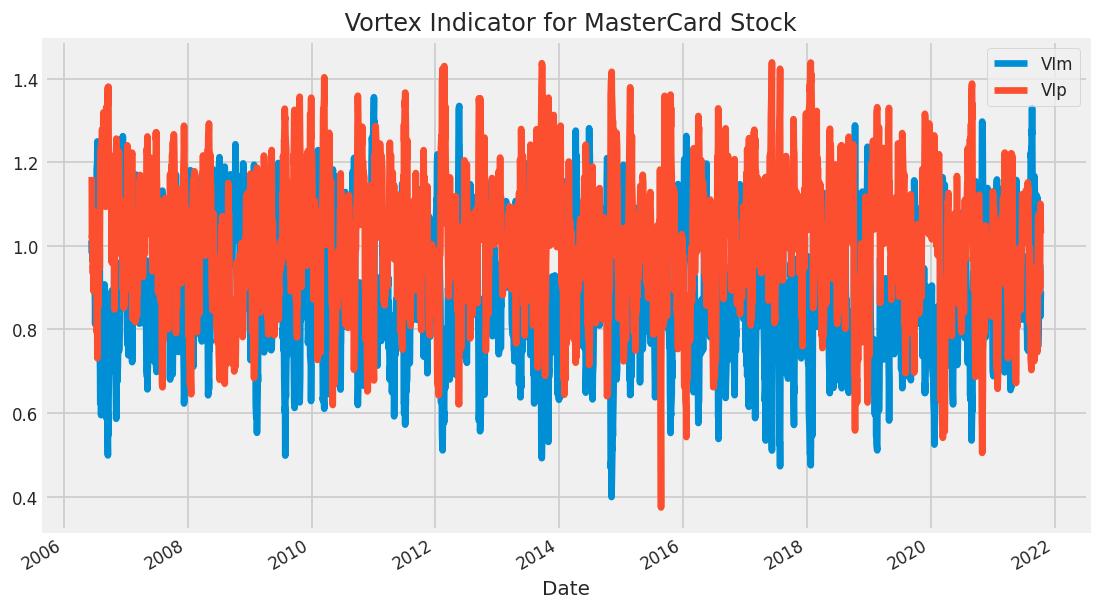

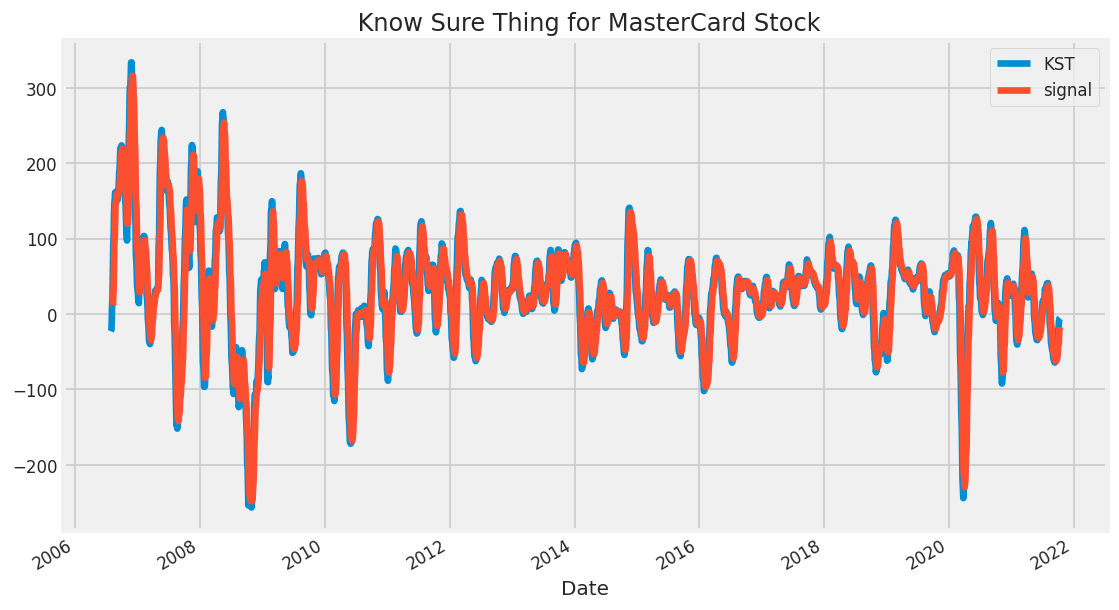

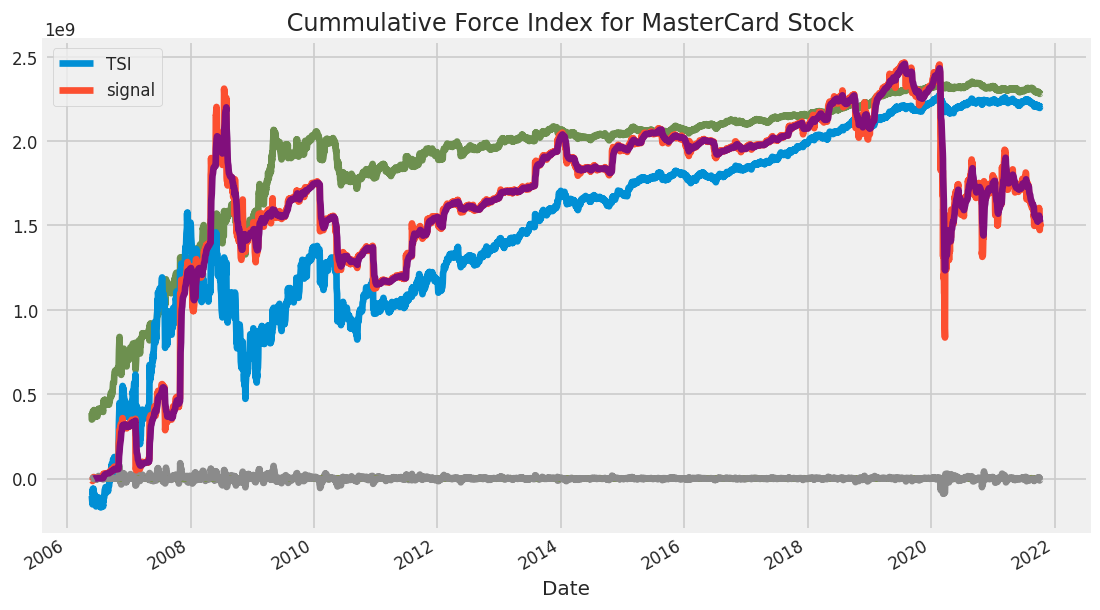

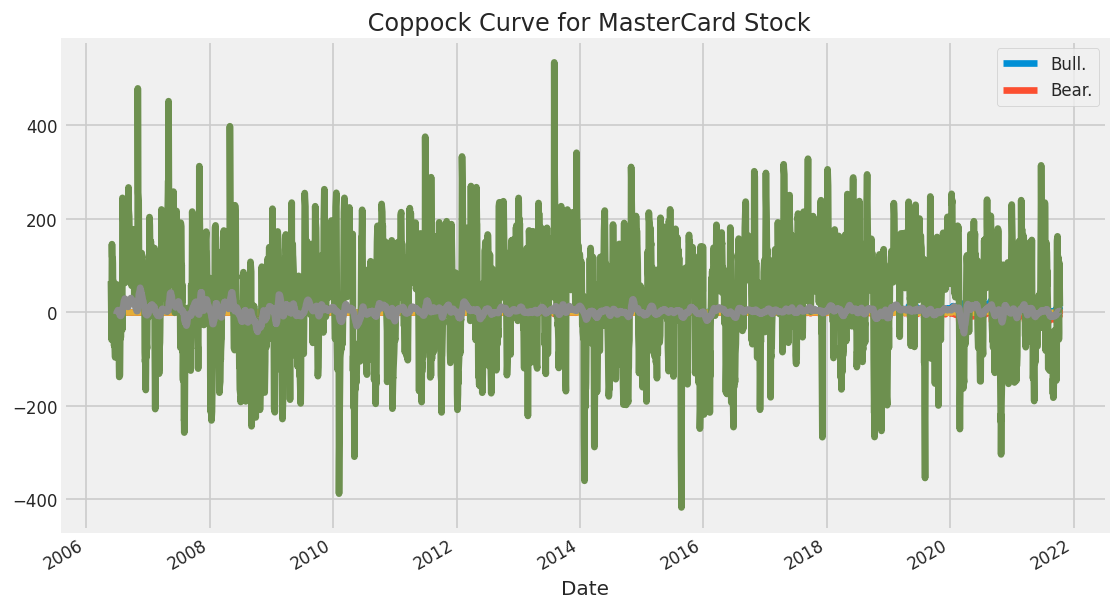

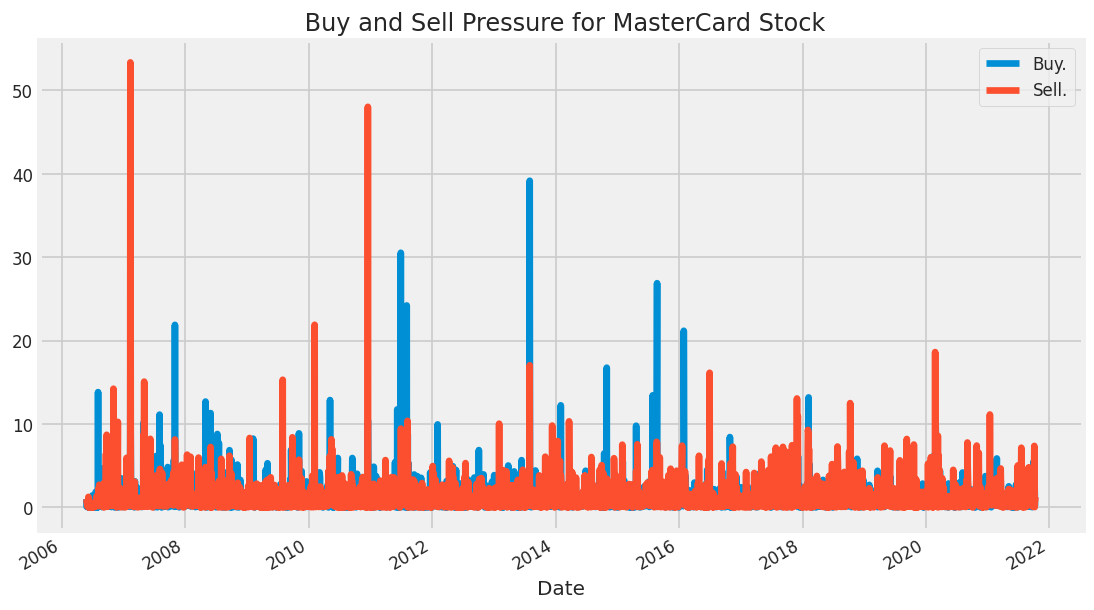

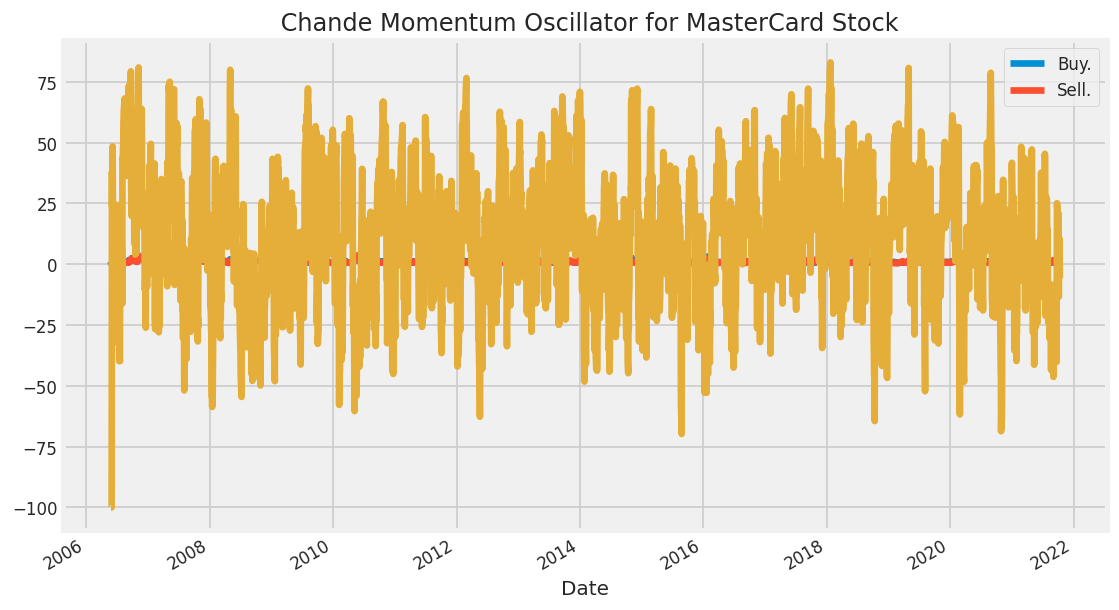

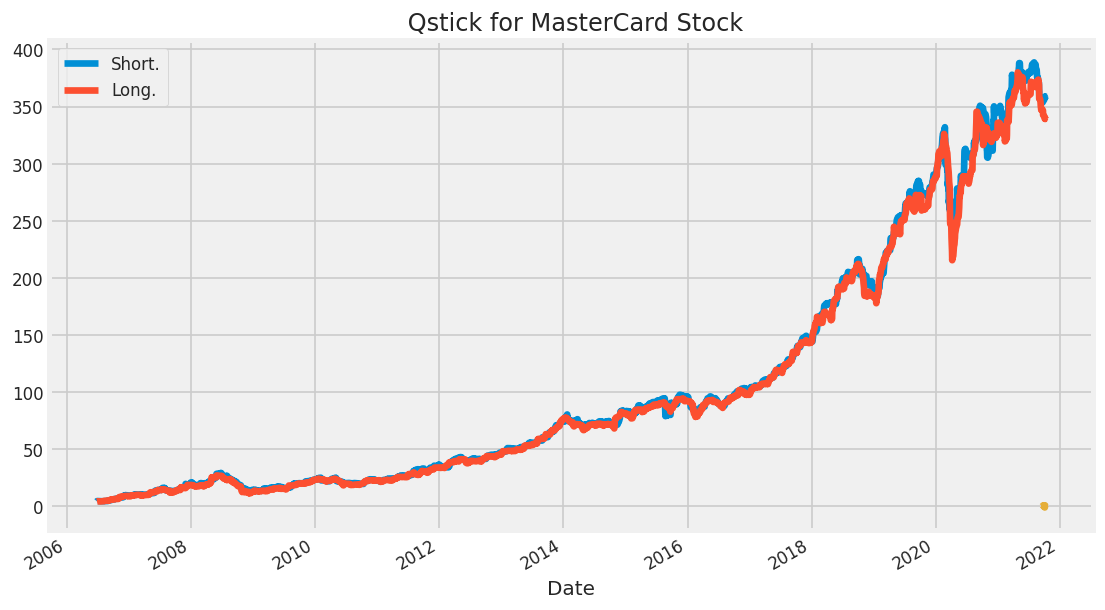

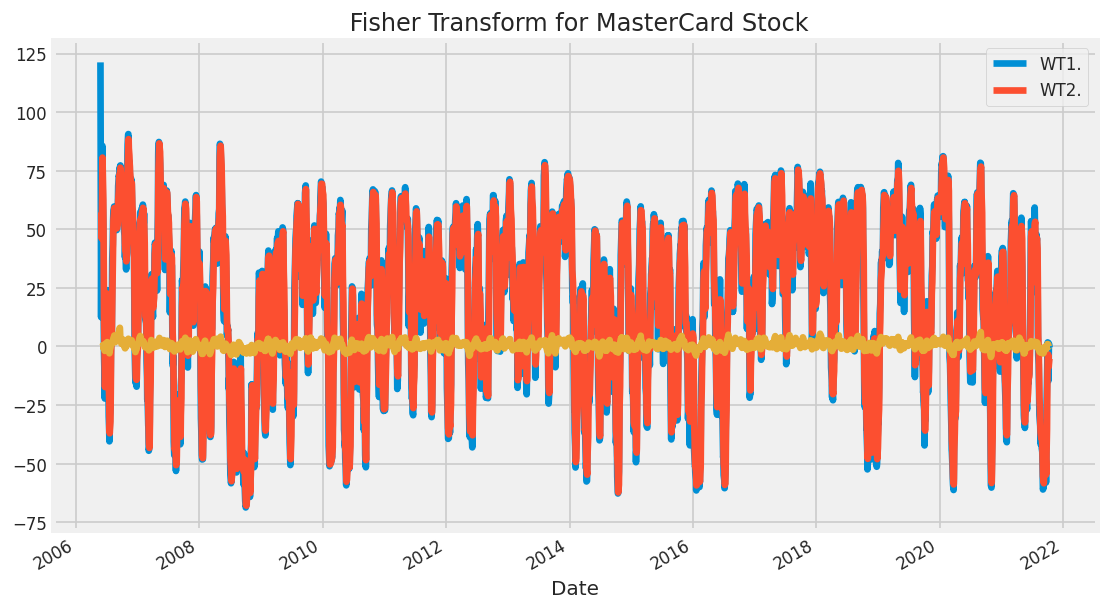

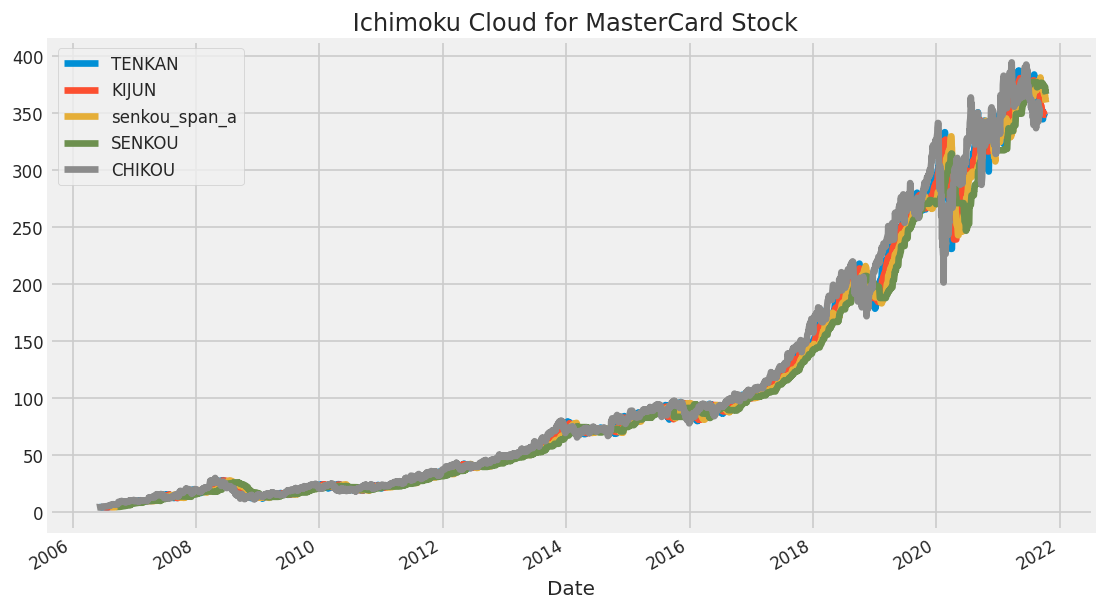

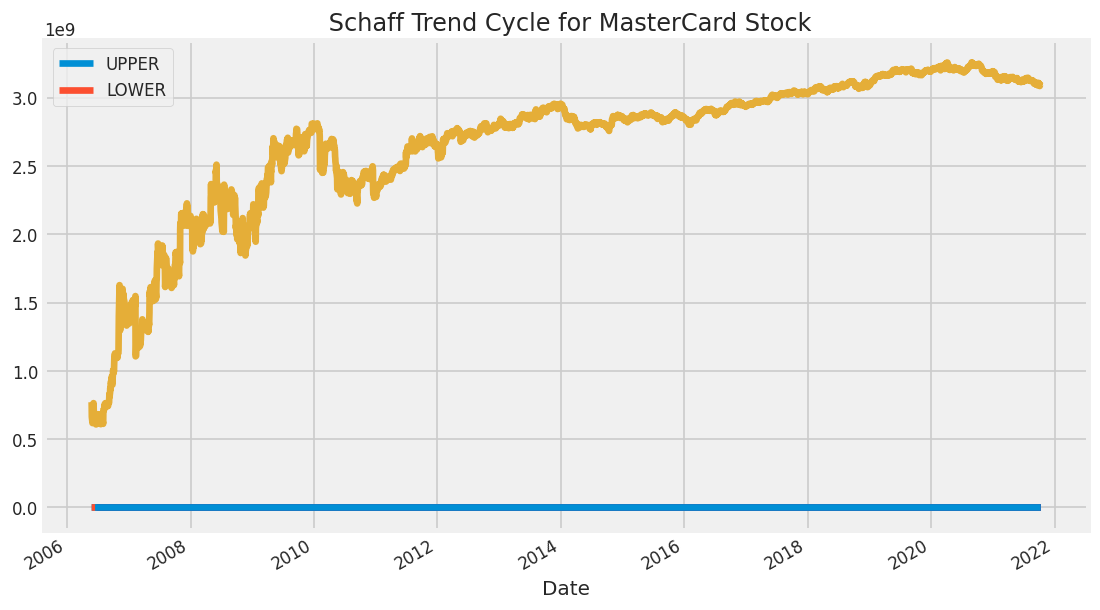

In [33]:
function_dict = {' Simple Moving Average ' : 'SMA',
                 ' Simple Moving Median ' : 'SMM',
                 ' Smoothed Simple Moving Average ' : 'SSMA',
                 ' Exponential Moving Average ' : 'EMA',
                 ' Double Exponential Moving Average ' : 'DEMA',
                 ' Triple Exponential Moving Average ' : 'TEMA',
                 ' Triangular Moving Average ' : 'TRIMA',
                 ' Triple Exponential Moving Average Oscillator ' : 'TRIX',
                 ' Volume Adjusted Moving Average ' : 'VAMA',
                 ' Kaufman Efficiency Indicator ' : 'ER',
                 ' Kaufmans Adaptive Moving Average ' : 'KAMA',
                 ' Zero Lag Exponential Moving Average ' : 'ZLEMA',
                 ' Weighted Moving Average ' : 'WMA',
                 ' Hull Moving Average ' : 'HMA',
                 ' Elastic Volume Moving Average ' : 'EVWMA',
                 ' Volume Weighted Average Price ' : 'VWAP',
                 ' Smoothed Moving Average ' : 'SMMA',
                 ' Fractal Adaptive Moving Average ' : 'FRAMA',
                 ' Moving Average Convergence Divergence ' : 'MACD',
                 ' Percentage Price Oscillator ' : 'PPO',
                 ' Volume-Weighted MACD ' : 'VW_MACD',
                 ' Elastic-Volume weighted MACD ' : 'EV_MACD',
                 ' Market Momentum ' : 'MOM',
                 ' Rate-of-Change ' : 'ROC',
                 ' Relative Strength Index ' : 'RSI',
                 ' Inverse Fisher Transform RSI ' : 'IFT_RSI',
                 ' True Range ' : 'TR',
                 ' Average True Range ' : 'ATR',
                 ' Stop-and-Reverse ' : 'SAR',
                 ' Bollinger Bands ' : 'BBANDS',
                 ' Bollinger Bands Width ' : 'BBWIDTH',
                 ' Momentum Breakout Bands ' : 'MOBO',
                 ' Percent B ' : 'PERCENT_B',
                 ' Keltner Channels ' : 'KC',
                 ' Donchian Channel ' : 'DO',
                 ' Directional Movement Indicator ' : 'DMI',
                 ' Average Directional Index ' : 'ADX',
                 ' Pivot Points ' : 'PIVOT',
                 ' Fibonacci Pivot Points ' : 'PIVOT_FIB',
                 ' Stochastic Oscillator Percent K ' : 'STOCH',
                 ' Stochastic oscillator Percent D ' : 'STOCHD',
                 ' Stochastic RSI ' : 'STOCHRSI',
                 ' Williams Percent R ' : 'WILLIAMS',
                 ' Ultimate Oscillator ' : 'UO',
                 ' Awesome Oscillator ' : 'AO',
                 ' Mass Index ' : 'MI',
                 ' Vortex Indicator ' : 'VORTEX',
                 ' Know Sure Thing ' : 'KST',
                 ' True Strength Index ' : 'TSI',
                 ' Typical Price ' : 'TP',
                 ' Accumulation-Distribution Line ' : 'ADL',
                 ' Chaikin Oscillator ' : 'CHAIKIN',
                 ' Money Flow Index ' : 'MFI',
                 ' On Balance Volume ' : 'OBV',
                 ' Weighter OBV ' : 'WOBV',
                 ' Volume Zone Oscillator ' : 'VZO',
                 ' Price Zone Oscillator ' : 'PZO',
                 ' Elders Force Index ' : 'EFI',
                 ' Cummulative Force Index ' : 'CFI',
                 ' Bull power and Bear Power ' : 'EBBP',
                 ' Ease of Movement ' : 'EMV',
                 ' Commodity Channel Index ' : 'CCI',
                 ' Coppock Curve ' : 'COPP',
                 ' Buy and Sell Pressure ' : 'BASP',
                 ' Normalized BASP ' : 'BASPN',
                 ' Chande Momentum Oscillator ' : 'CMO',
                 ' Chandelier Exit ' : 'CHANDELIER',
                 ' Qstick ' : 'QSTICK',
                 #' Twiggs Money Index ' : 'TMF',
                 ' Wave Trend Oscillator ' : 'WTO',
                 ' Fisher Transform ' : 'FISH',
                 ' Ichimoku Cloud ' : 'ICHIMOKU',
                 ' Adaptive Price Zone ' : 'APZ',
                 #' Squeeze Momentum Indicator ' : 'SQZMI',
                 ' Volume Price Trend ' : 'VPT',
                 ' Finite Volume Element ' : 'FVE',
                 ' Volume Flow Indicator ' : 'VFI',
                 ' Moving Standard deviation ' : 'MSD',
                 ' Schaff Trend Cycle ' : 'STC'}

for key, value in function_dict .items():
    function_name = "TA." + value + "(ohlc).plot(title='" + key + "for MasterCard Stock')"
    result = eval(function_name)

# 8 BackTesting Trading Strategy

In [34]:
# Defining DEMA cross strategy
class DemaCross(Strategy):

    def init(self):

        self.ma1 = self.I(TA.DEMA, ohlc, 10)
        self.ma2 = self.I(TA.DEMA, ohlc, 20)

    def next(self):
        if crossover(self.ma1, self.ma2):
            self.buy()
        elif crossover(self.ma2, self.ma1):
            self.sell()

## Let us do a bit of backtesting with a value of $100000 

In [35]:
bt = Backtest(ohlc, DemaCross,
              cash=100000, commission=0.015, exclusive_orders=True)

## Back Testing Summary

In [36]:
bt.run()

Start                     2006-05-25 00:00:00
End                       2021-10-11 00:00:00
Duration                   5618 days 00:00:00
Exposure Time [%]                   73.295455
Equity Final [$]                   128.498859
Equity Peak [$]                 115881.039112
Return [%]                         -99.871501
Buy & Hold Return [%]             8012.464831
Return (Ann.) [%]                  -35.160521
Volatility (Ann.) [%]               20.170238
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -99.889373
Avg. Drawdown [%]                  -25.653566
Max. Drawdown Duration     5484 days 00:00:00
Avg. Drawdown Duration     1122 days 00:00:00
# Trades                                  244
Win Rate [%]                         22.95082
Best Trade [%]                      21.503467
Worst Trade [%]                    -30.067069
Avg. Trade [%]                    

### As you can see, if you had invested `$100,000` in Mastercard shares, you would have got `$7,728,855` by now with a return of  `7629%`!

## Use Zoom to see the performance of the stock

In [37]:
bt.plot()

Row(id='1434', ...)

## Try another strategy - K Nearest Neighbor

##### Reference from Backtesting Manual

##### Please note this is a simple implementation of the example and is no way close to a professional trading strategy. This is purely for showing an example

In [38]:
import numpy as np


def get_X(data):
    """Return model design matrix X"""
    return data.filter(like='X').values


def get_y(data):
    """Return dependent variable y"""
    y = data.Close.pct_change(48).shift(-48)  # Returns after roughly two days
    y[y.between(-.004, .004)] = 0             # Devalue returns smaller than 0.4%
    y[y > 0] = 1
    y[y < 0] = -1
    return y


def get_clean_Xy(df):
    """Return (X, y) cleaned of NaN values"""
    X = get_X(df)
    y = get_y(df).values
    isnan = np.isnan(y)
    X = X[~isnan]
    y = y[~isnan]
    return X, y

In [39]:
data=ohlc

In [40]:
from backtesting.test import SMA

def BBANDS(data, n_lookback, n_std):
    """Bollinger bands indicator"""
    hlc3 = (data.High + data.Low + data.Close) / 3
    mean, std = hlc3.rolling(n_lookback).mean(), hlc3.rolling(n_lookback).std()
    upper = mean + n_std*std
    lower = mean - n_std*std
    return upper, lower


close = data.Close.values
sma10 = SMA(data.Close, 10)
sma20 = SMA(data.Close, 20)
sma50 = SMA(data.Close, 50)
sma100 = SMA(data.Close, 100)
upper, lower = BBANDS(data, 20, 2)

# Design matrix / independent features:

# Price-derived features
data['X_SMA10'] = (close - sma10) / close
data['X_SMA20'] = (close - sma20) / close
data['X_SMA50'] = (close - sma50) / close
data['X_SMA100'] = (close - sma100) / close

data['X_DELTA_SMA10'] = (sma10 - sma20) / close
data['X_DELTA_SMA20'] = (sma20 - sma50) / close
data['X_DELTA_SMA50'] = (sma50 - sma100) / close

# Indicator features
data['X_MOM'] = data.Close.pct_change(periods=2)
data['X_BB_upper'] = (upper - close) / close
data['X_BB_lower'] = (lower - close) / close
data['X_BB_width'] = (upper - lower) / close
data['X_Sentiment'] = ~data.index.to_series().between('2017-09-27', '2017-12-14')

# Some datetime features for good measure
data['X_day'] = data.index.dayofweek
data['X_hour'] = data.index.hour

#data = data.apply(pd.to_numeric)
#data = data.dropna().astype(np.float64)
#data.fillna(method="ffill")
#data =data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]

#data.replace([np.inf, -np.inf], 0.0, inplace=True)
#data = data.fillna(data.mean(), inplace=True)
data = data.dropna().astype(np.float64)


Classification accuracy:  0.6859903381642513


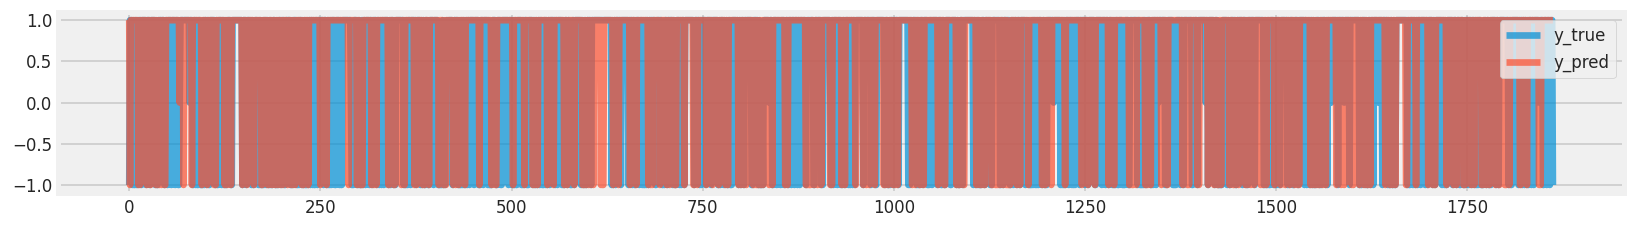

In [41]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X, y = get_clean_Xy(data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

clf = KNeighborsClassifier(7)  # Model the output based on 7 "nearest" examples
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

_ = pd.DataFrame({'y_true': y_test, 'y_pred': y_pred}).plot(figsize=(15, 2), alpha=.7)
print('Classification accuracy: ', np.mean(y_test == y_pred))

In [42]:
%%time

from backtesting import Backtest, Strategy

N_TRAIN = 400


class MLTrainOnceStrategy(Strategy):
    price_delta = .004  # 0.4%

    def init(self):        
        # Init our model, a kNN classifier
        self.clf = KNeighborsClassifier(7)

        # Train the classifier in advance on the first N_TRAIN examples
        df = self.data.df.iloc[:N_TRAIN]
        X, y = get_clean_Xy(df)
        self.clf.fit(X, y)

        # Plot y for inspection
        self.I(get_y, self.data.df, name='y_true')

        # Prepare empty, all-NaN forecast indicator
        self.forecasts = self.I(lambda: np.repeat(np.nan, len(self.data)), name='forecast')

    def next(self):
        # Skip the training, in-sample data
        if len(self.data) < N_TRAIN:
            return

        # Proceed only with out-of-sample data. Prepare some variables
        high, low, close = self.data.High, self.data.Low, self.data.Close
        current_time = self.data.index[-1]

        # Forecast the next movement
        X = get_X(self.data.df.iloc[-1:])
        forecast = self.clf.predict(X)[0]

        # Update the plotted "forecast" indicator
        self.forecasts[-1] = forecast

        # If our forecast is upwards and we don't already hold a long position
        # place a long order for 20% of available account equity. Vice versa for short.
        # Also set target take-profit and stop-loss prices to be one price_delta
        # away from the current closing price.
        upper, lower = close[-1] * (1 + np.r_[1, -1]*self.price_delta)

        if forecast == 1 and not self.position.is_long:
            self.buy(size=.2, tp=upper, sl=lower)
        elif forecast == -1 and not self.position.is_short:
            self.sell(size=.2, tp=lower, sl=upper)

        # Additionally, set aggressive stop-loss on trades that have been open 
        # for more than two days
        for trade in self.trades:
            if current_time - trade.entry_time > pd.Timedelta('2 days'):
                if trade.is_long:
                    trade.sl = max(trade.sl, low)
                else:
                    trade.sl = min(trade.sl, high)


bt = Backtest(data, MLTrainOnceStrategy, commission=.0002, margin=.05)
bt.run()

CPU times: user 4.4 s, sys: 23 ms, total: 4.43 s
Wall time: 4.42 s


Start                     2006-10-16 00:00:00
End                       2021-10-11 00:00:00
Duration                   5474 days 00:00:00
Exposure Time [%]                   13.861649
Equity Final [$]                     4.558307
Equity Peak [$]                       10000.0
Return [%]                         -99.954417
Buy & Hold Return [%]              5127.08347
Return (Ann.) [%]                   -40.18084
Volatility (Ann.) [%]                10.83635
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                  -99.954417
Avg. Drawdown [%]                  -99.954417
Max. Drawdown Duration     4893 days 00:00:00
Avg. Drawdown Duration     4893 days 00:00:00
# Trades                                  523
Win Rate [%]                         6.118547
Best Trade [%]                       0.671689
Worst Trade [%]                     -5.997233
Avg. Trade [%]                    

In [43]:
bt.plot()

Row(id='2242', ...)

# 8.1 BackTesting Trading Strategy Using KNN

In [44]:
from backtesting import Strategy
from backtesting.lib import crossover


class Sma4Cross(Strategy):
    n1 = 50
    n2 = 100
    n_enter = 20
    n_exit = 10
    
    def init(self):
        self.sma1 = self.I(SMA, self.data.Close, self.n1)
        self.sma2 = self.I(SMA, self.data.Close, self.n2)
        self.sma_enter = self.I(SMA, self.data.Close, self.n_enter)
        self.sma_exit = self.I(SMA, self.data.Close, self.n_exit)
        
    def next(self):
        
        if not self.position:
            
            # On upwards trend, if price closes above
            # "entry" MA, go long
            
            # Here, even though the operands are arrays, this
            # works by implicitly comparing the two last values
            if self.sma1 > self.sma2:
                if crossover(self.data.Close, self.sma_enter):
                    self.buy()
                    
            # On downwards trend, if price closes below
            # "entry" MA, go short
            
            else:
                if crossover(self.sma_enter, self.data.Close):
                    self.sell()
        
        # But if we already hold a position and the price
        # closes back below (above) "exit" MA, close the position
        
        else:
            if (self.position.is_long and
                crossover(self.sma_exit, self.data.Close)
                or
                self.position.is_short and
                crossover(self.data.Close, self.sma_exit)):
                
                self.position.close()

# 8.2 BackTesting Trading Strategy Heatmaps

In [45]:
%%time 

from backtesting import Backtest
from backtesting.test import GOOG


backtest = Backtest(ohlc, Sma4Cross, commission=.002)

stats, heatmap = backtest.optimize(
    n1=range(10, 110, 10),
    n2=range(20, 210, 20),
    n_enter=range(15, 35, 5),
    n_exit=range(10, 25, 5),
    constraint=lambda p: p.n_exit < p.n_enter < p.n1 < p.n2,
    maximize='Equity Final [$]',
    max_tries=200,
    random_state=0,
    return_heatmap=True)

Backtest.optimize:   0%|          | 0/5 [00:00<?, ?it/s]

CPU times: user 500 ms, sys: 41.6 ms, total: 542 ms
Wall time: 14 s


In [46]:
heatmap

n1   n2   n_enter  n_exit
20   60   15       10        10200.609296
     80   15       10        15245.851028
     100  15       10        16201.321646
30   40   20       15         9160.646086
          25       15         5373.420829
                                 ...     
100  200  15       10        12138.719723
          20       10        10075.892860
                   15         7977.940949
          25       10         7643.537558
          30       10         2818.509311
Name: Equity Final [$], Length: 177, dtype: float64

In [47]:
hm = heatmap.groupby(['n1', 'n2']).mean().unstack()
hm

n2           40            60            80            100          120  \
n1                                                                        
20           NaN  10200.609296  15245.851028  16201.321646          NaN   
30   7267.033457  10603.816652  10381.363852   8416.304447  9581.176706   
40           NaN   5356.778899           NaN   2780.543482  5074.166692   
50           NaN   3691.001056   6250.000624   8602.531990  7019.923859   
60           NaN           NaN  11158.235004   6228.199688  6610.270771   
70           NaN           NaN  11670.658818   4012.798384  6556.402758   
80           NaN           NaN           NaN  11469.578904  6234.678280   
90           NaN           NaN           NaN   4515.885664  5898.788489   
100          NaN           NaN           NaN           NaN  7214.829814   

n2            140           160           180          200  
n1                                                          
20            NaN           NaN           NaN          NaN  
30   12472.612759  11020.062093   9251.042704  9669.130290  
40   10830.097415  11234.717465   7765.270577  8463.862146  
50   11148.309972   7950.716644   6106.165477  7640.429813  
60    8869.100296   6789.737401  10375.875908  6415.360760  
70   14390.044046  10233.943321   9373.768372  8286.829472  
80    8357.580876   9595.741152   9312.299634  8974.881162  
90    9282.830704  12949.704989  15544.217820  8808.125494  
100   8496.398833   8205.549555  10269.024841  8130.920080

In [48]:
from backtesting.lib import plot_heatmaps


plot_heatmaps(heatmap, agg='mean')

Column(id='2897', ...)

In [49]:
%%capture

!pip install scikit-optimize  # This is a run-time dependency

In [50]:
%%time

stats_skopt, heatmap, optimize_result = backtest.optimize(
    n1=[10, 100],      # Note: For method="skopt", we
    n2=[20, 200],      # only need interval end-points
    n_enter=[10, 40],
    n_exit=[10, 30],
    constraint=lambda p: p.n_exit < p.n_enter < p.n1 < p.n2,
    maximize='Equity Final [$]',
    method='skopt',
    max_tries=200,
    random_state=0,
    return_heatmap=True,
    return_optimization=True)

Backtest.optimize:   0%|          | 0/200 [00:00<?, ?it/s]

CPU times: user 34 s, sys: 167 ms, total: 34.2 s
Wall time: 34.1 s


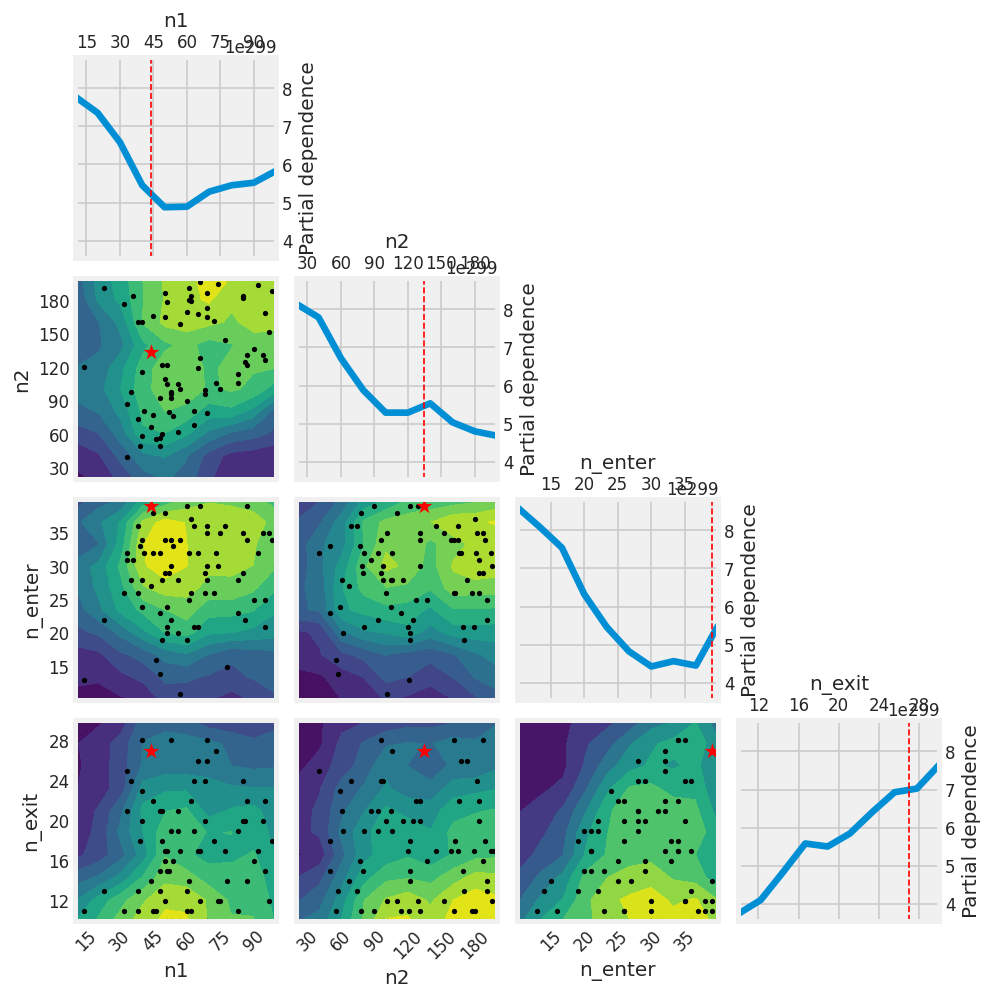

In [51]:
from skopt.plots import plot_objective

_ = plot_objective(optimize_result, n_points=10)

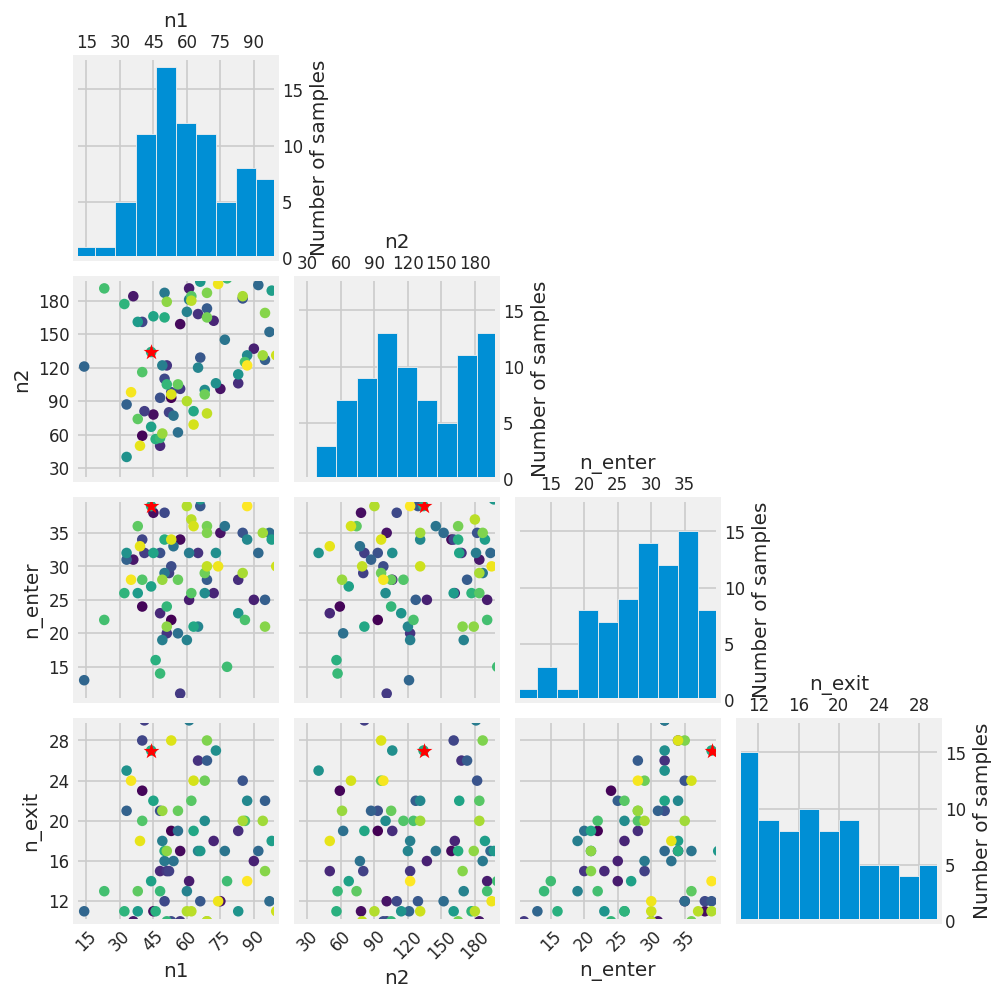

In [52]:
from skopt.plots import plot_evaluations

_ = plot_evaluations(optimize_result, bins=10)

## Work In Progress